<title>Data understanding</title>

<h1>Data understanding</h1>

In [98]:
# pip install pyspark

In [99]:

import pyspark
from pyspark.sql.functions import when, col, count, rand, sum, concat, lit, array,size, concat_ws, skewness, mean
from pyspark.ml.fpm import FPGrowth, PrefixSpan
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [100]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Itteration 4').getOrCreate()

<h2>Import datasets</h2>

In [101]:
app_raw = spark.read.csv('F:/University/Postgrad/2023 Sem 2/INFOSYS 722/Assignments/Data used/application_data.csv', header=True, inferSchema=True)
prev_raw = spark.read.csv("F:/University/Postgrad/2023 Sem 2/INFOSYS 722/Assignments/Data used/bureau.csv", header=True, inferSchema=True)

In [102]:
app_raw.show()
app_raw.printSchema()

+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+-------------------+-------------------+-------------------+--------------+----------------+---------------------------+------------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+------------

In [103]:
prev_raw.show()
prev_raw.printSchema()


+----------+------------+-------------+---------------+-----------+------------------+-------------------+-----------------+----------------------+------------------+--------------+-------------------+--------------------+----------------------+---------------+------------------+-----------+
|SK_ID_CURR|SK_ID_BUREAU|CREDIT_ACTIVE|CREDIT_CURRENCY|DAYS_CREDIT|CREDIT_DAY_OVERDUE|DAYS_CREDIT_ENDDATE|DAYS_ENDDATE_FACT|AMT_CREDIT_MAX_OVERDUE|CNT_CREDIT_PROLONG|AMT_CREDIT_SUM|AMT_CREDIT_SUM_DEBT|AMT_CREDIT_SUM_LIMIT|AMT_CREDIT_SUM_OVERDUE|    CREDIT_TYPE|DAYS_CREDIT_UPDATE|AMT_ANNUITY|
+----------+------------+-------------+---------------+-----------+------------------+-------------------+-----------------+----------------------+------------------+--------------+-------------------+--------------------+----------------------+---------------+------------------+-----------+
|    215354|     5714462|       Closed|     currency 1|       -497|                 0|             -153.0|           -153

<h2>Visualise data</h2>

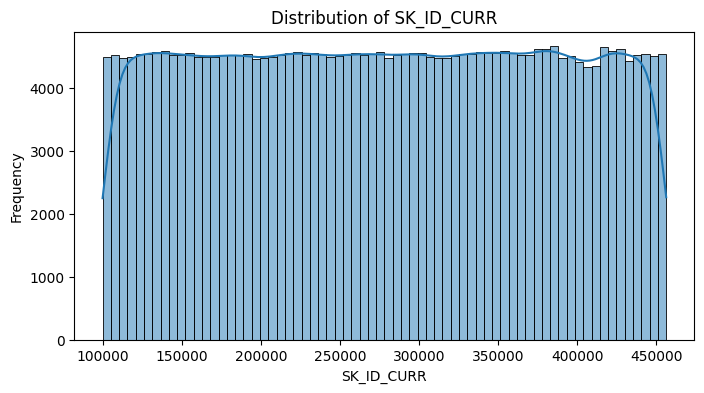

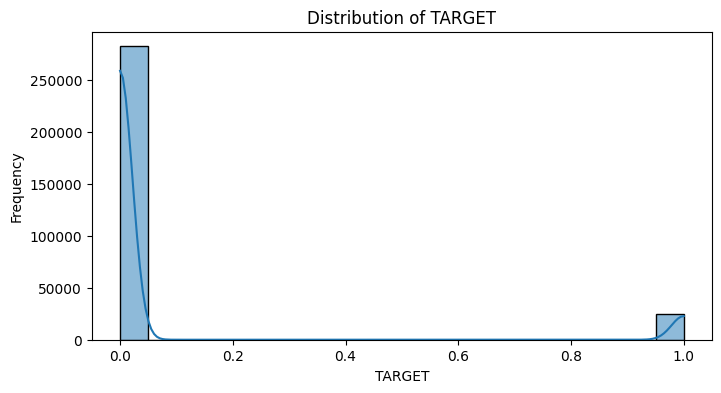

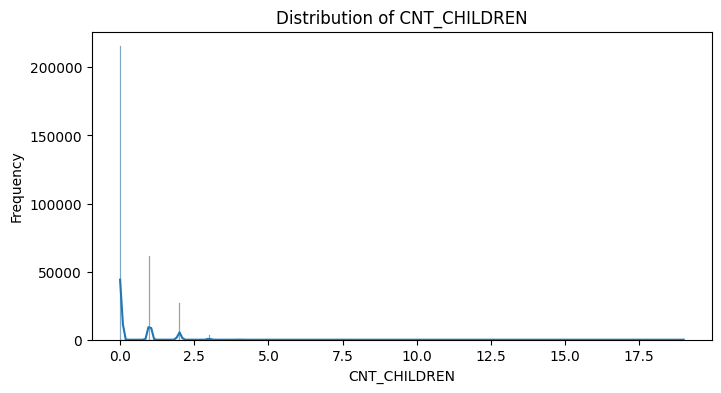

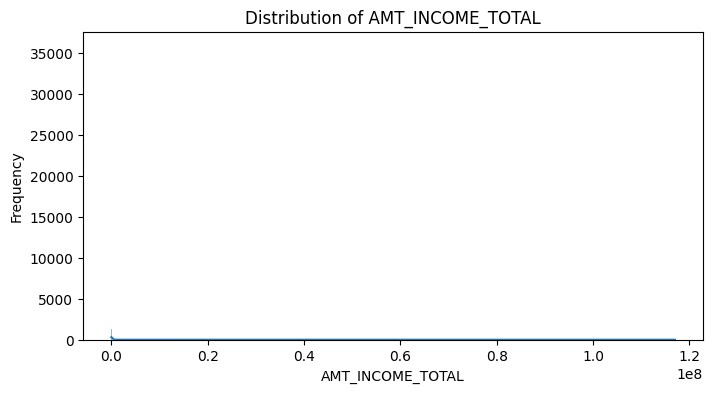

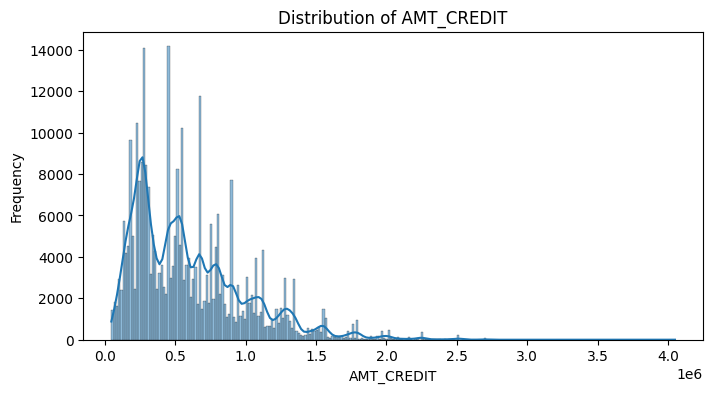

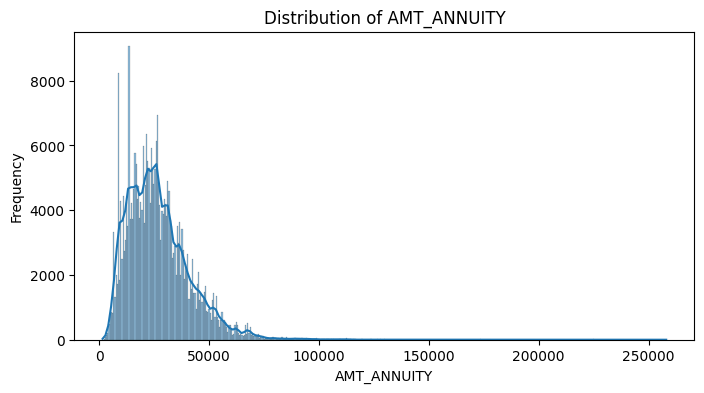

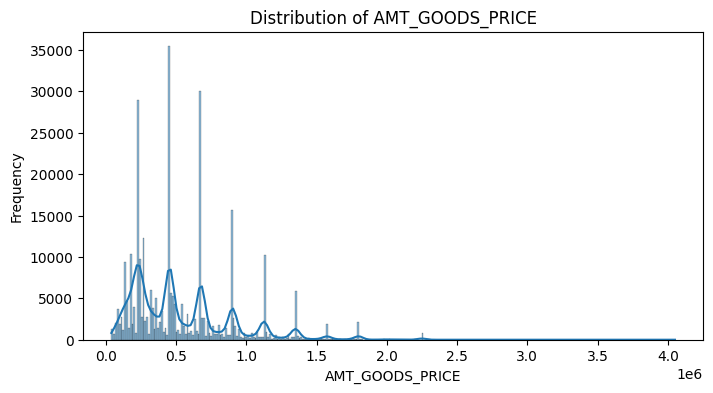

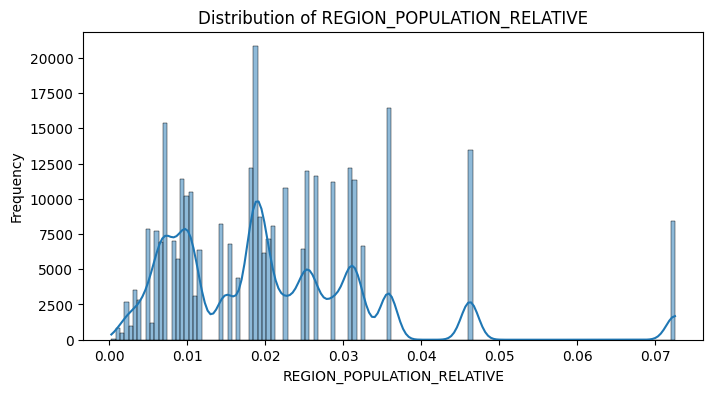

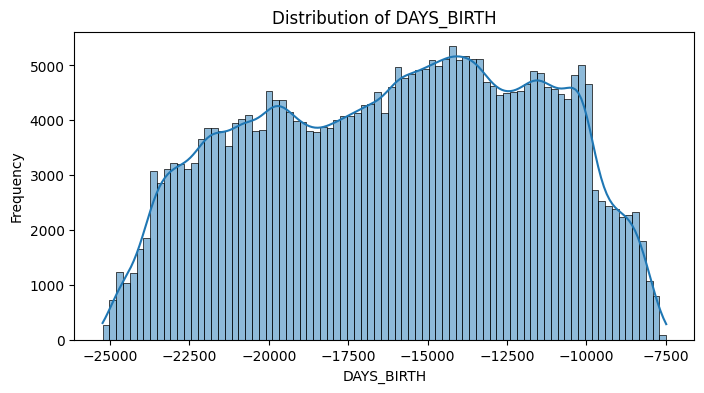

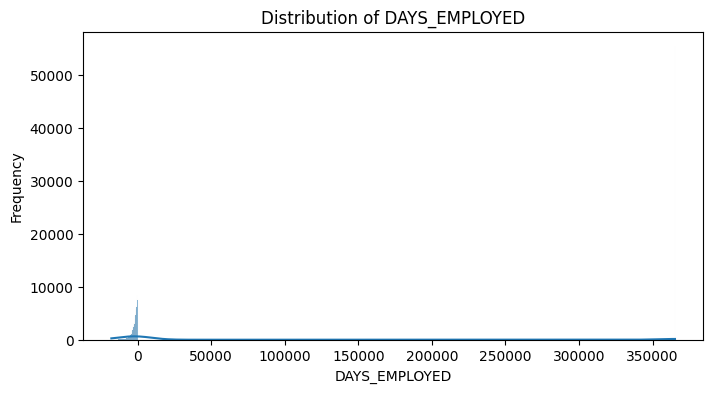

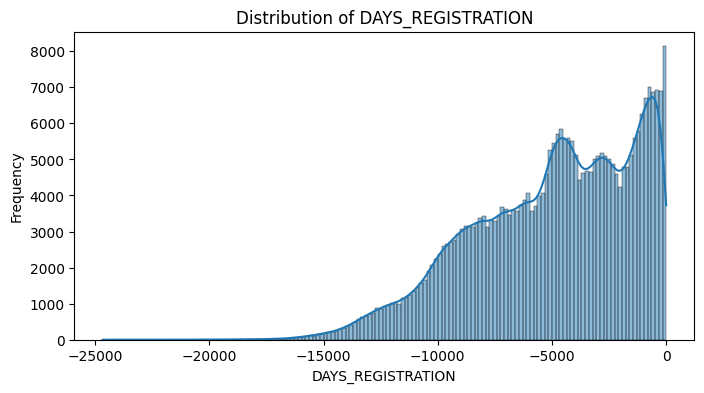

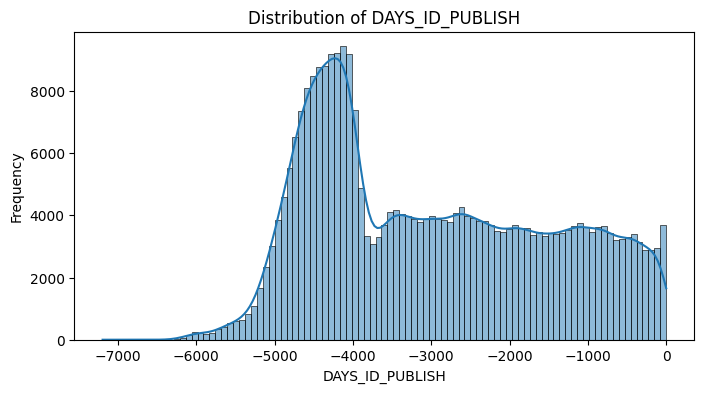

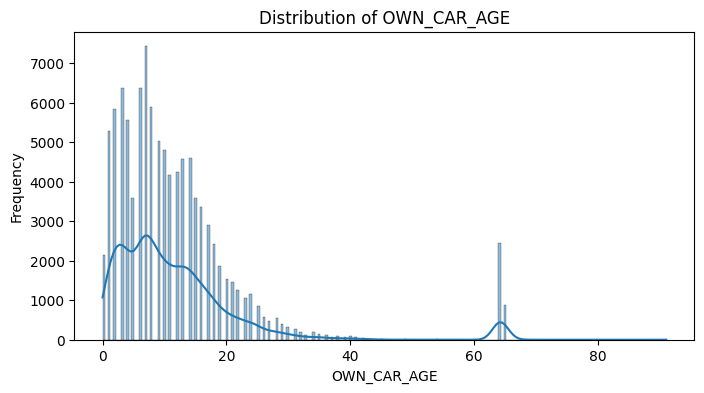

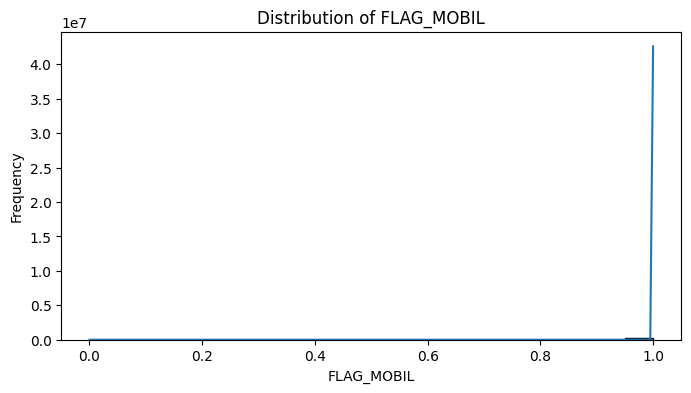

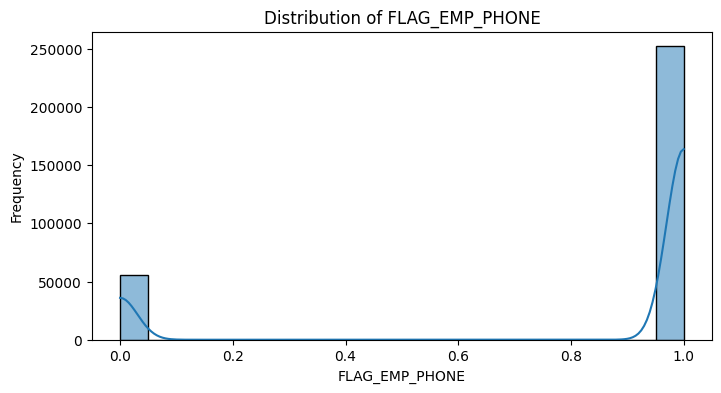

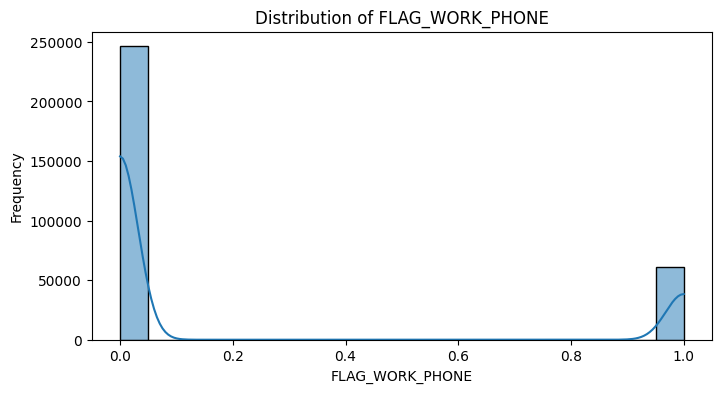

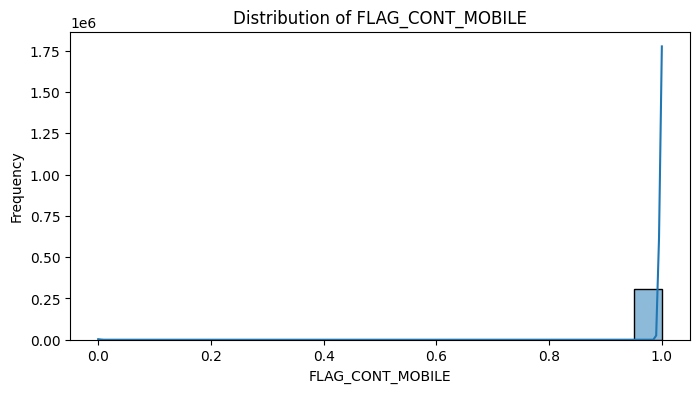

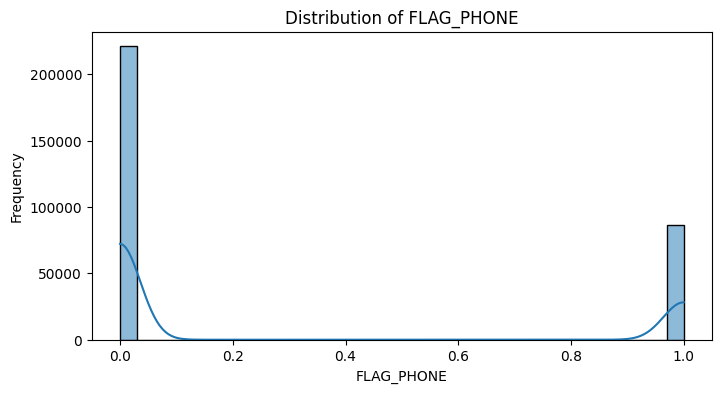

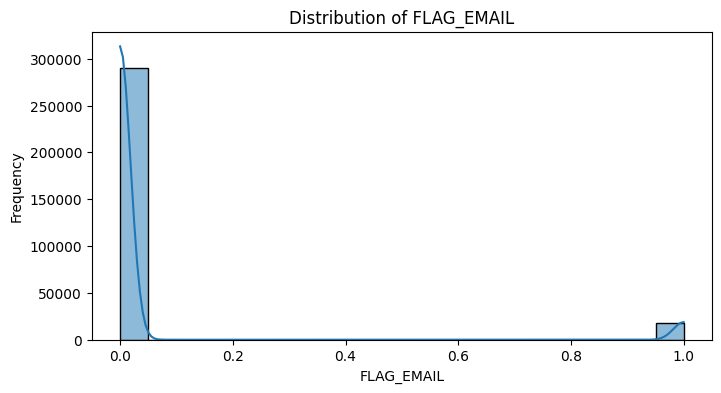

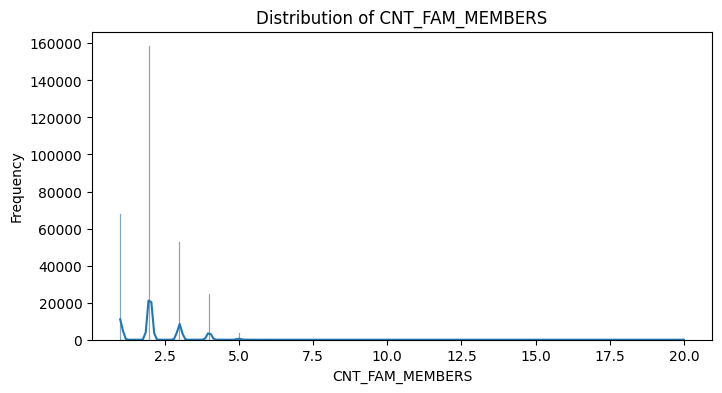

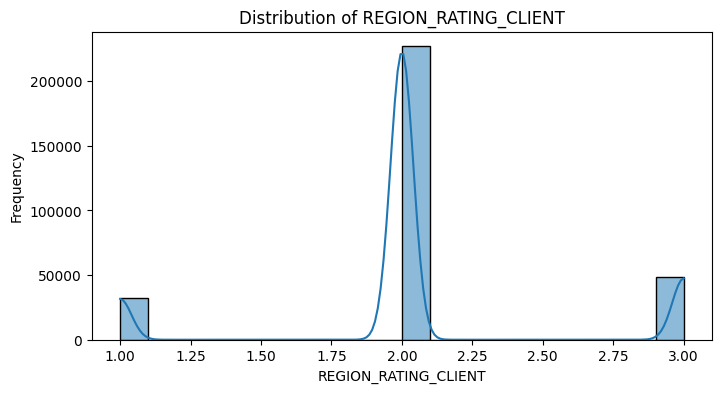

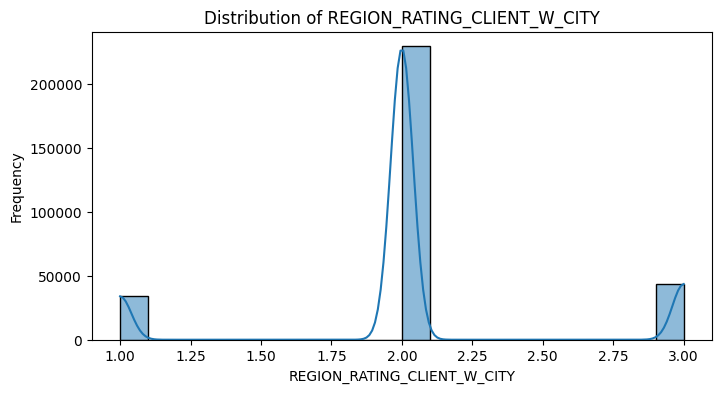

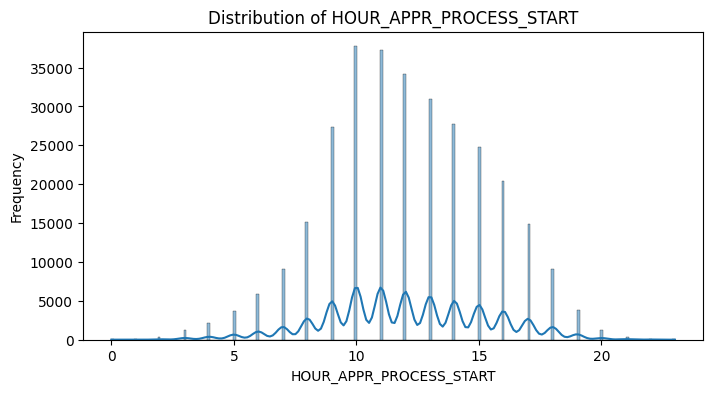

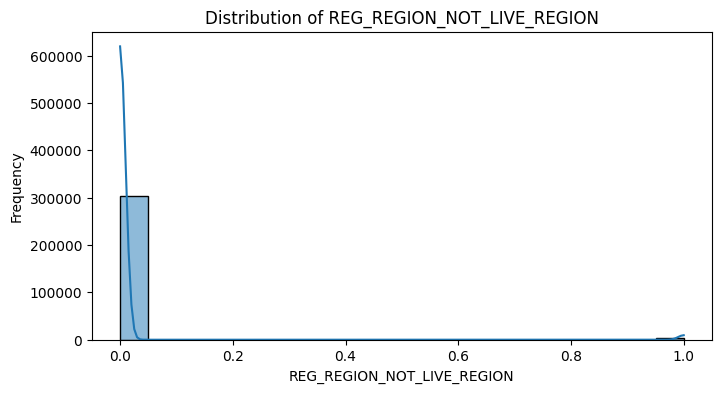

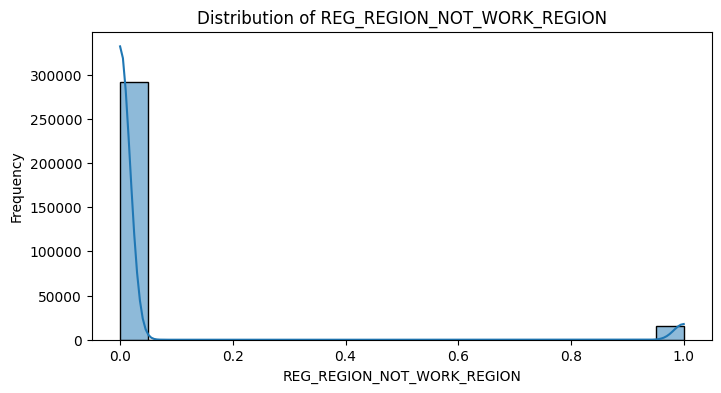

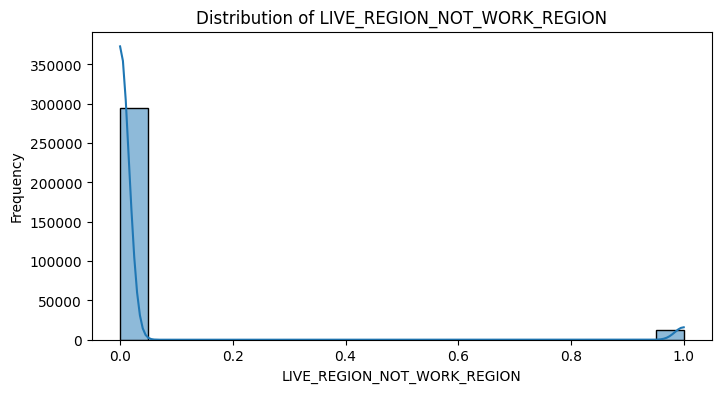

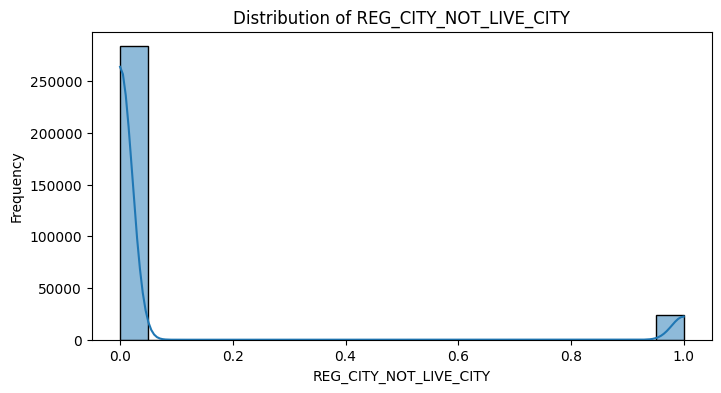

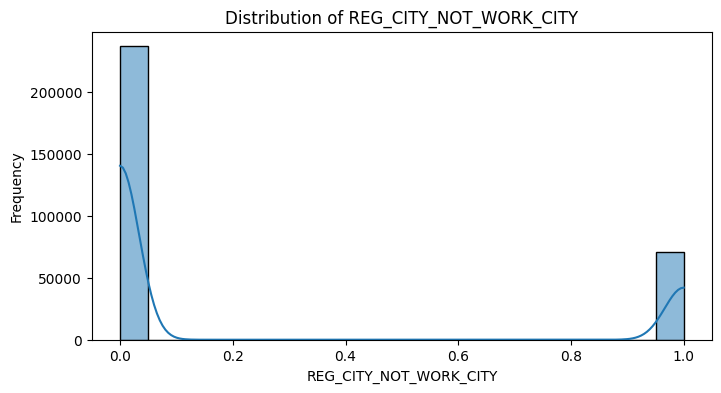

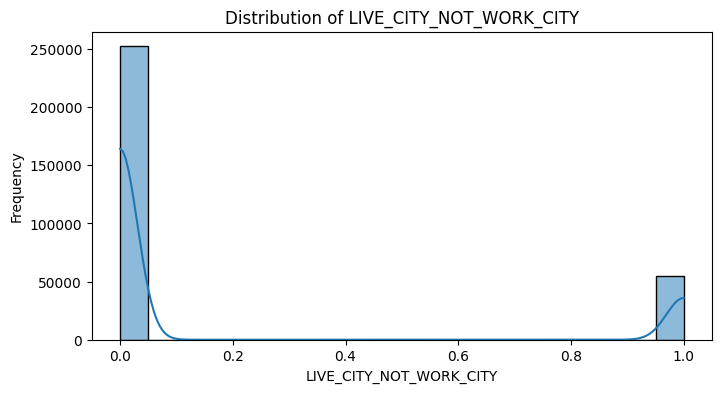

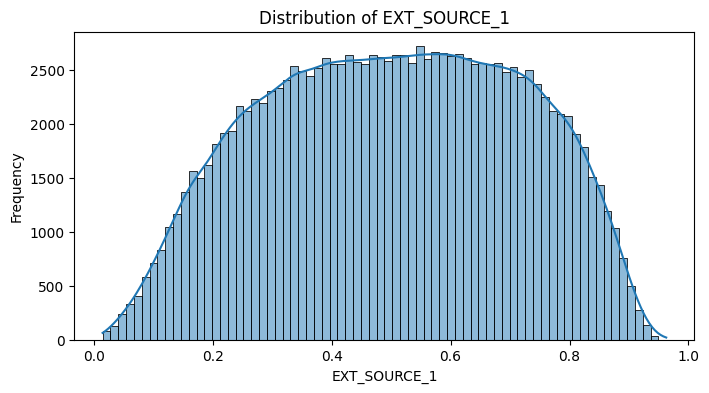

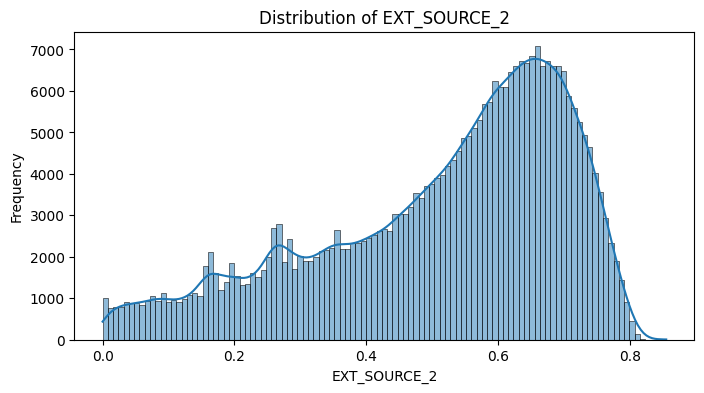

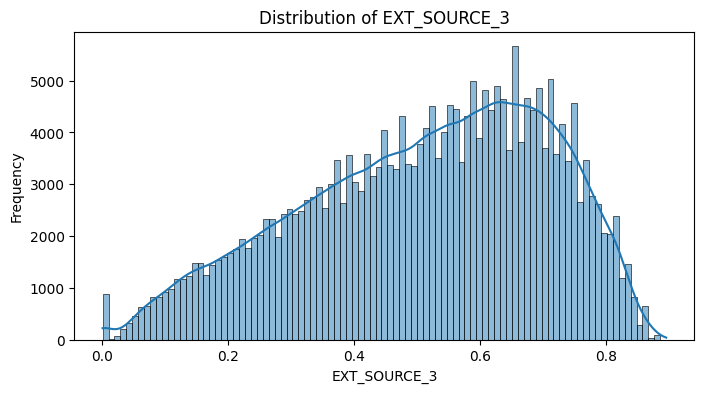

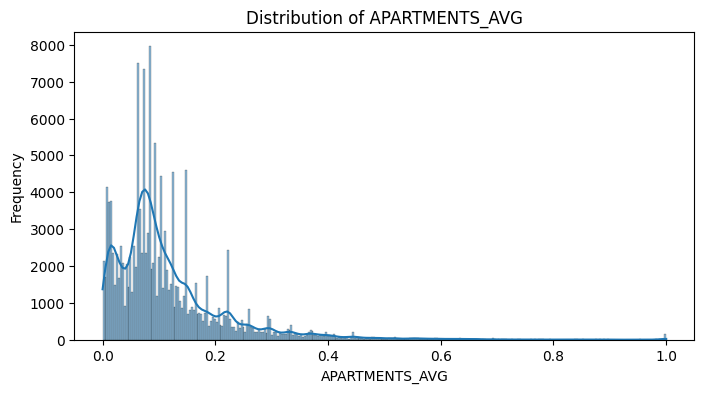

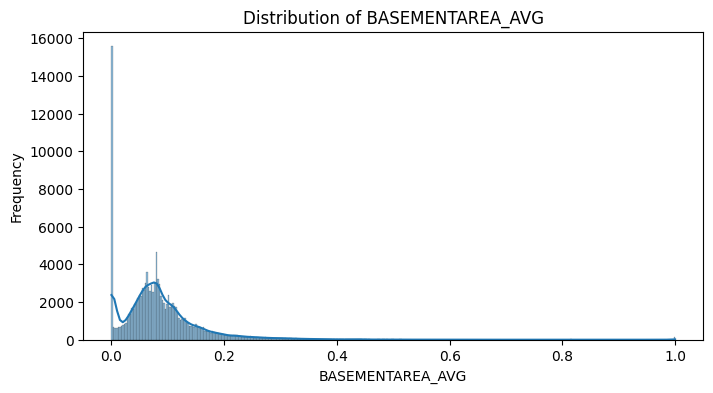

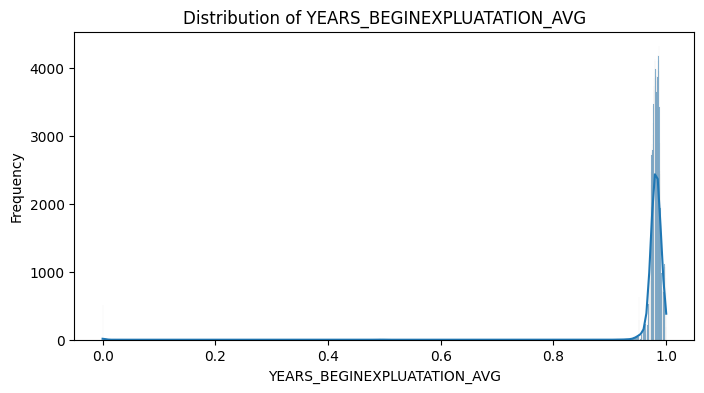

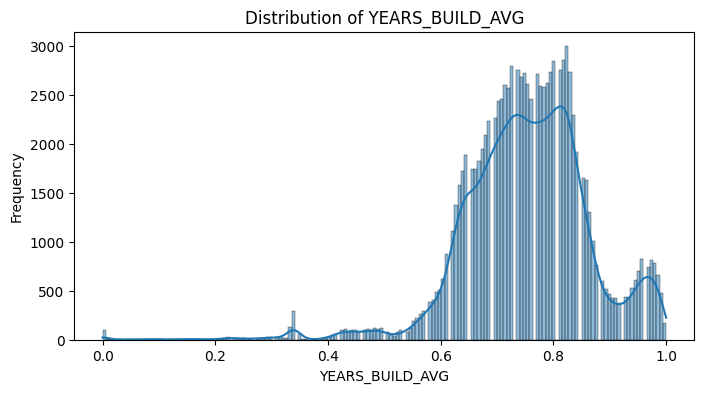

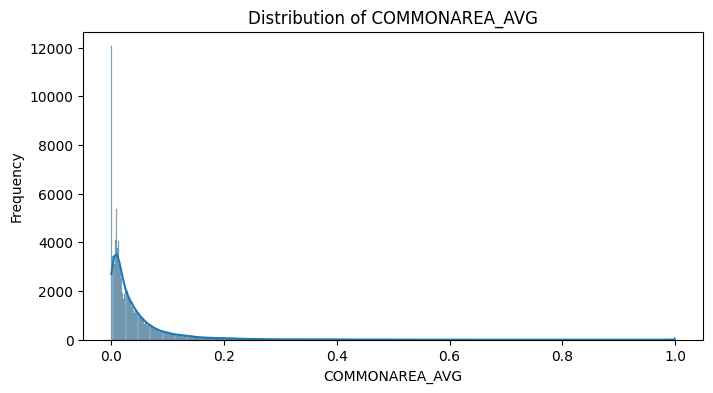

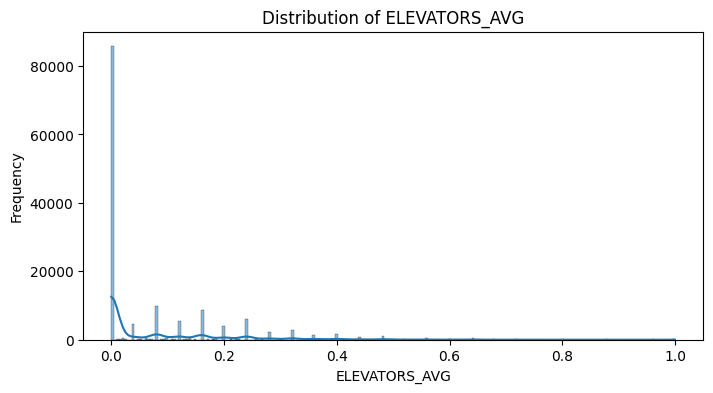

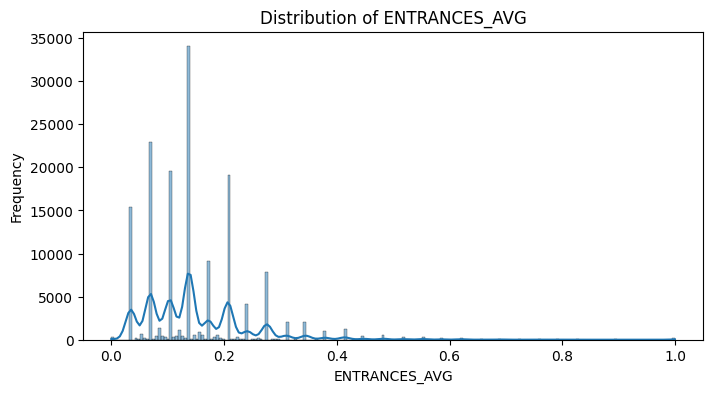

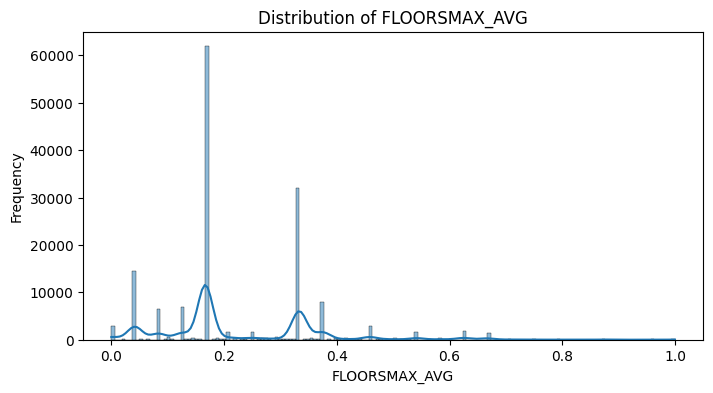

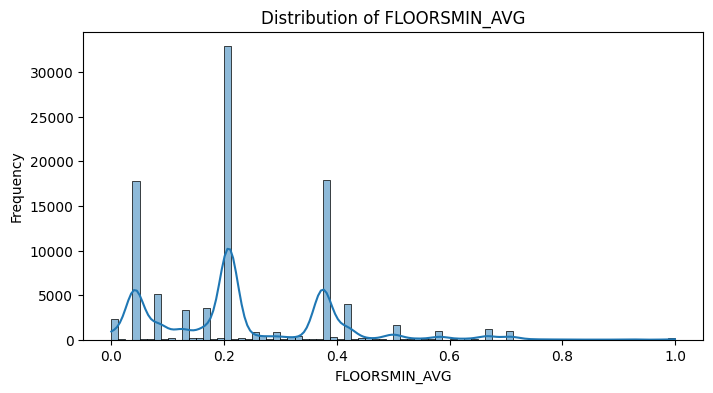

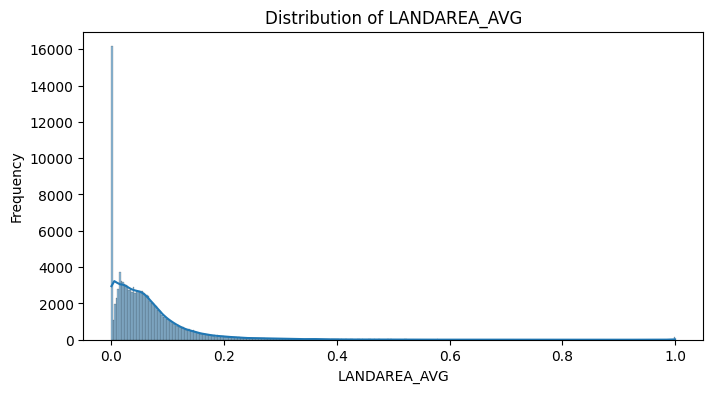

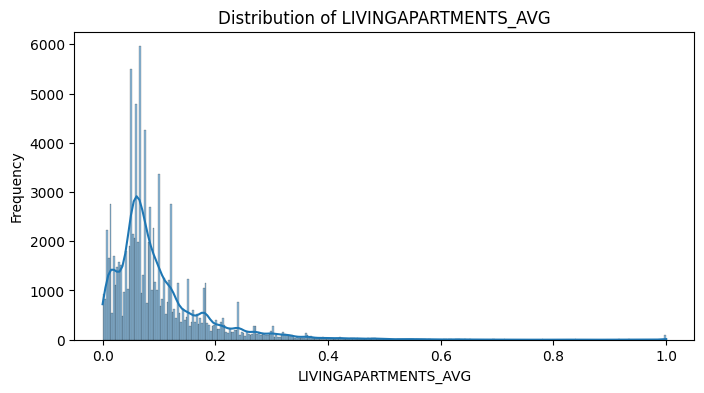

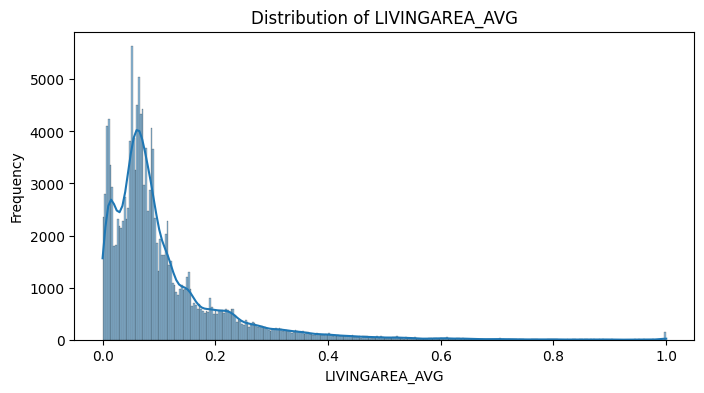

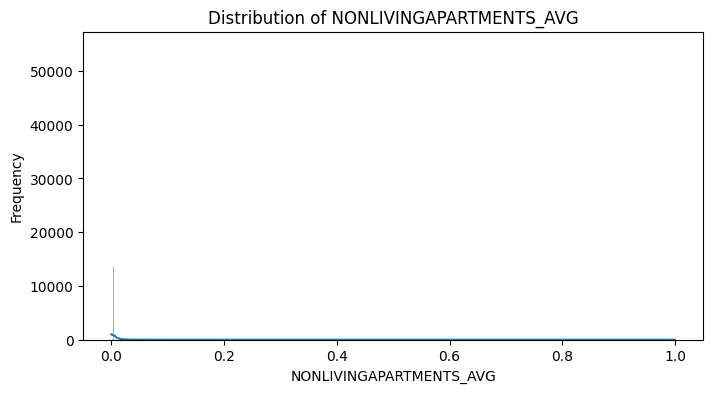

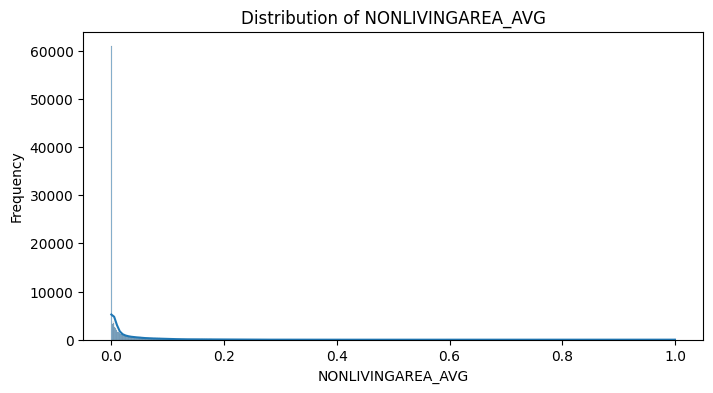

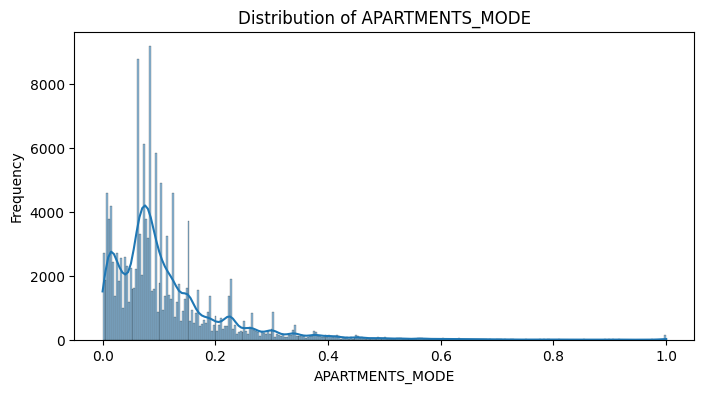

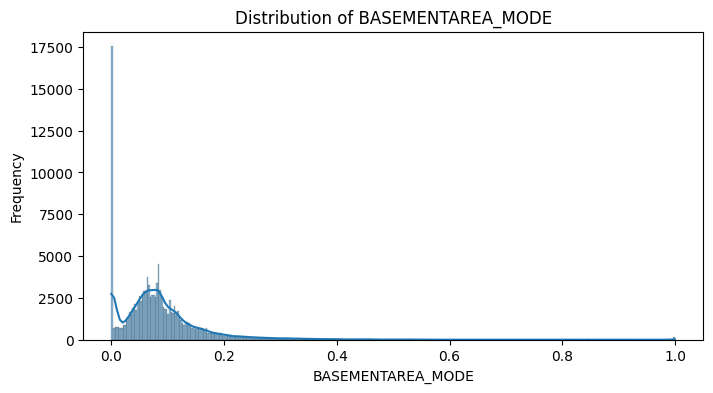

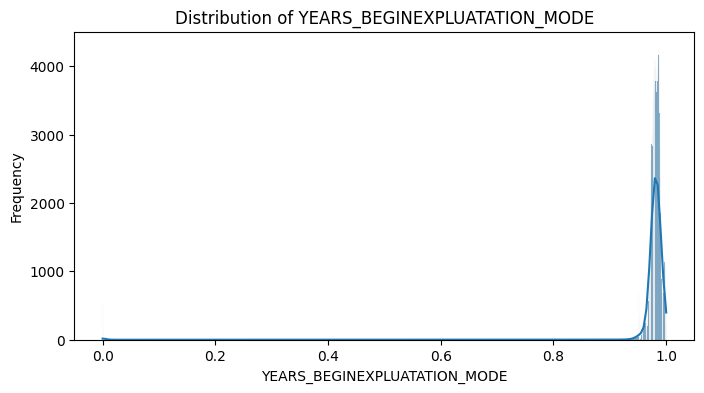

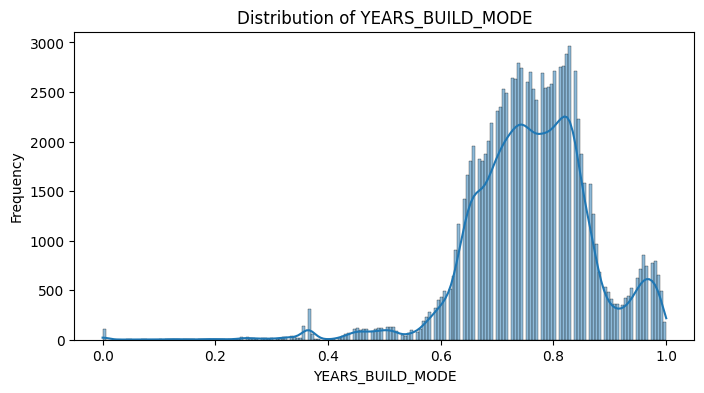

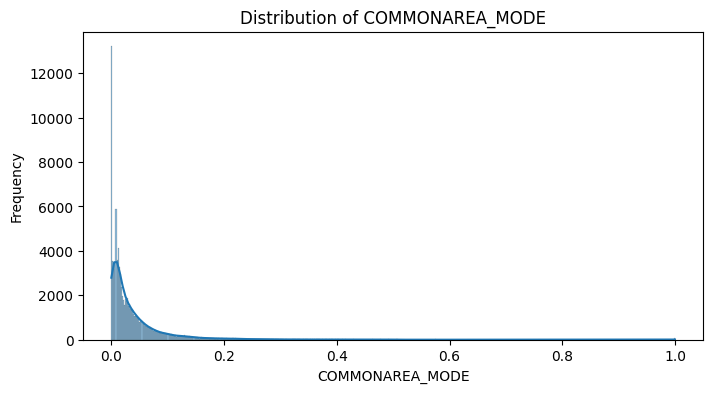

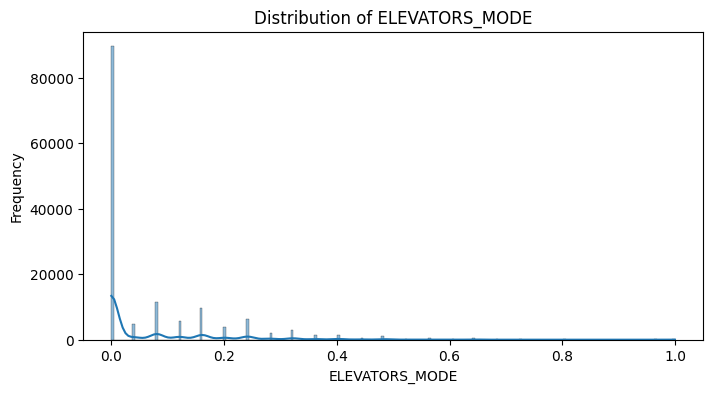

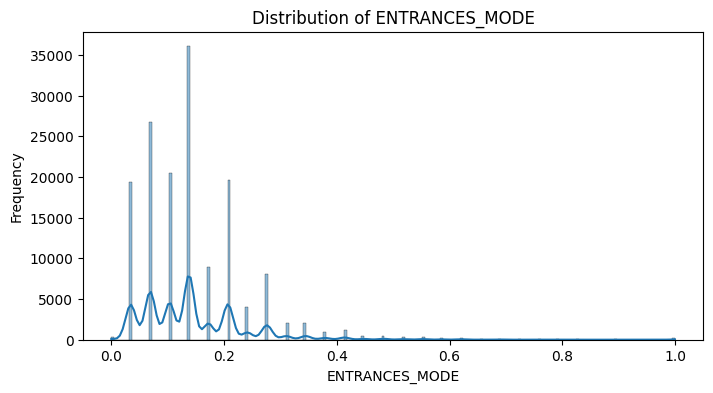

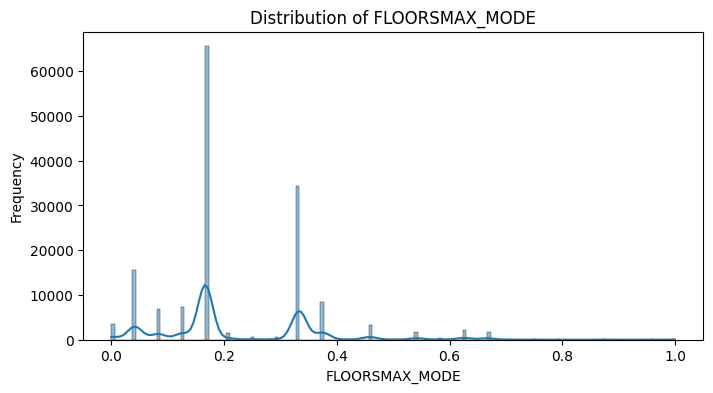

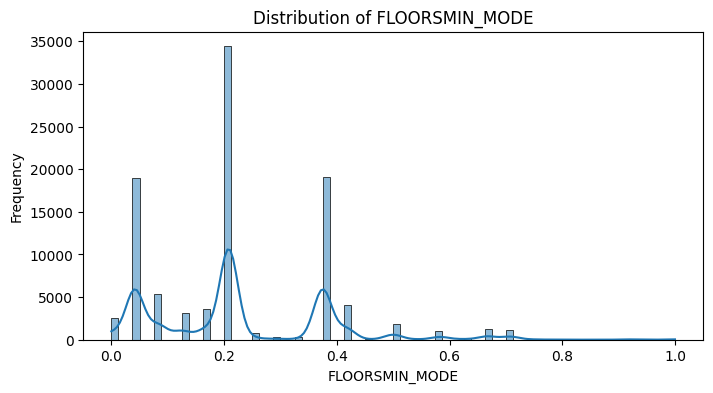

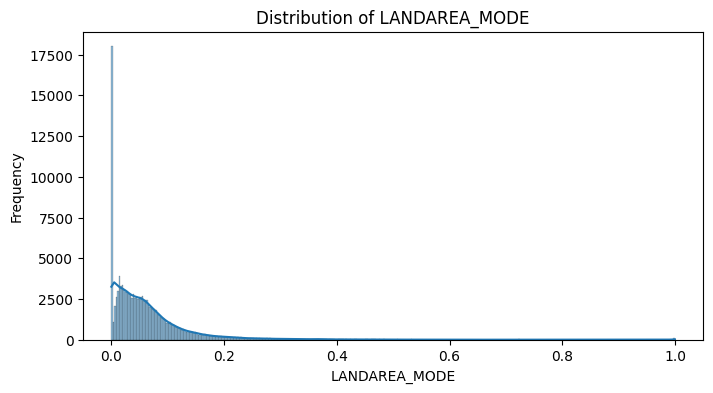

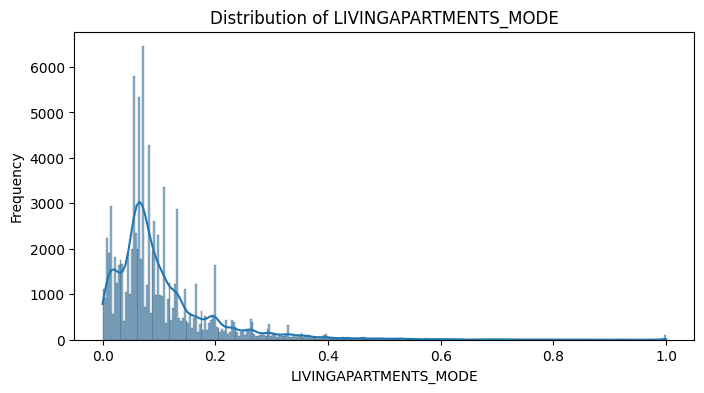

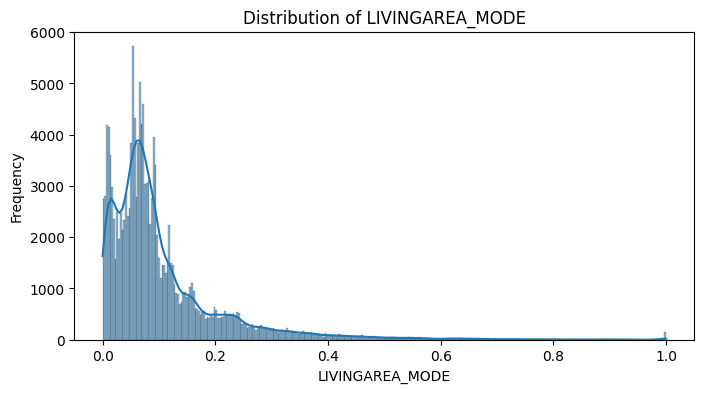

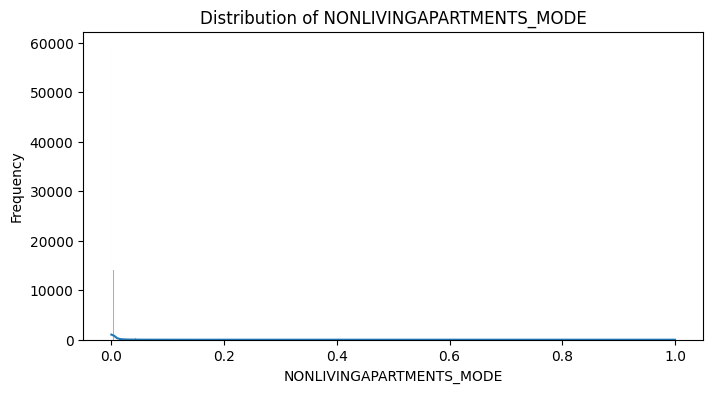

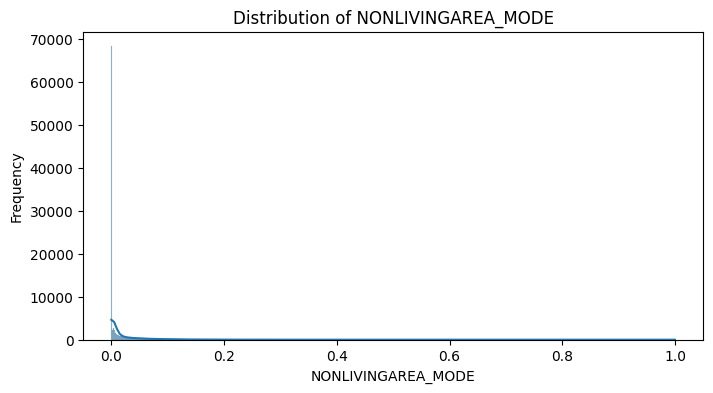

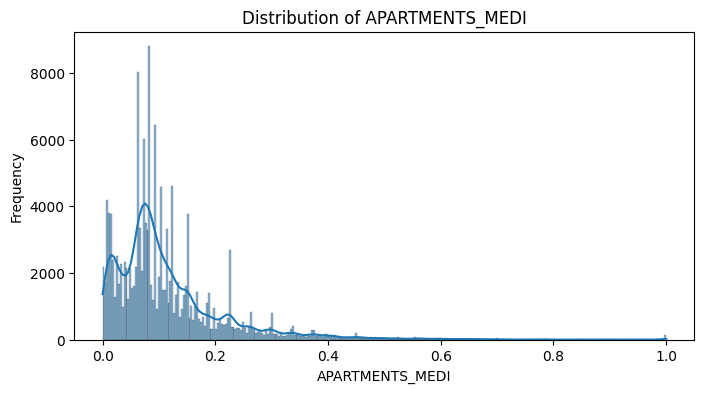

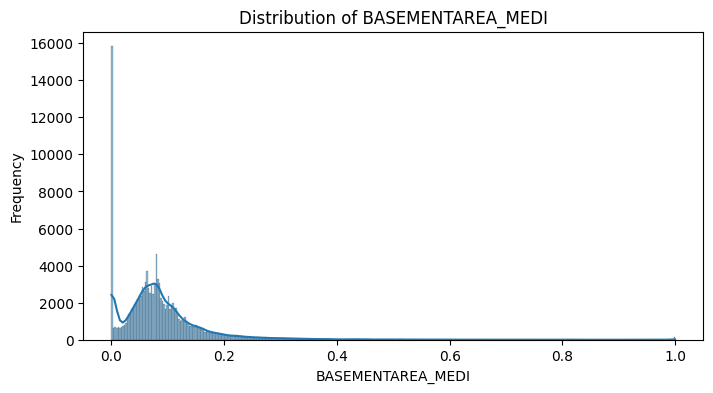

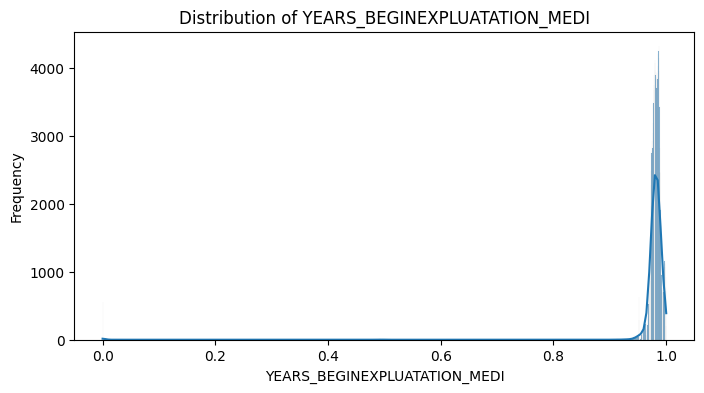

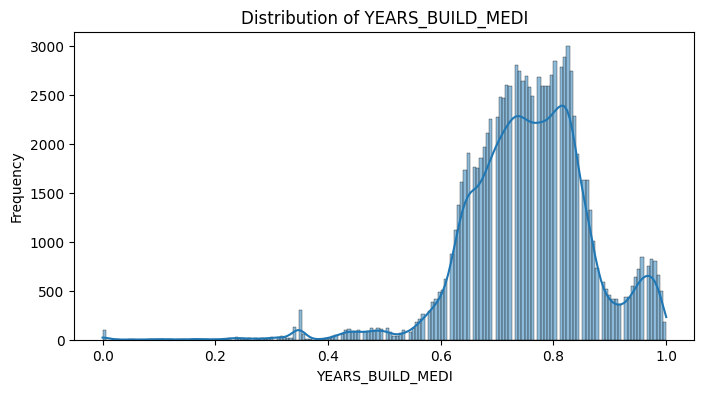

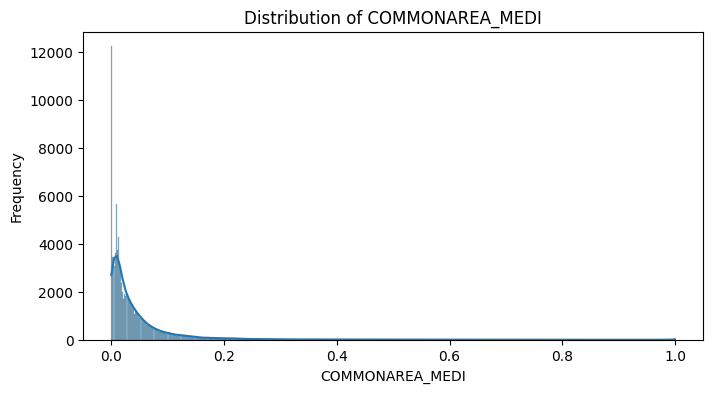

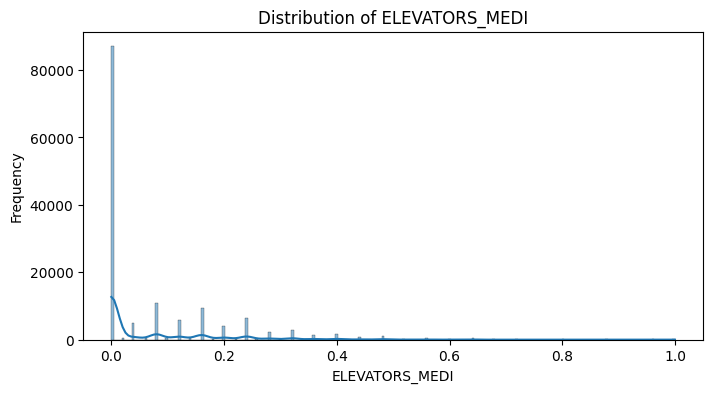

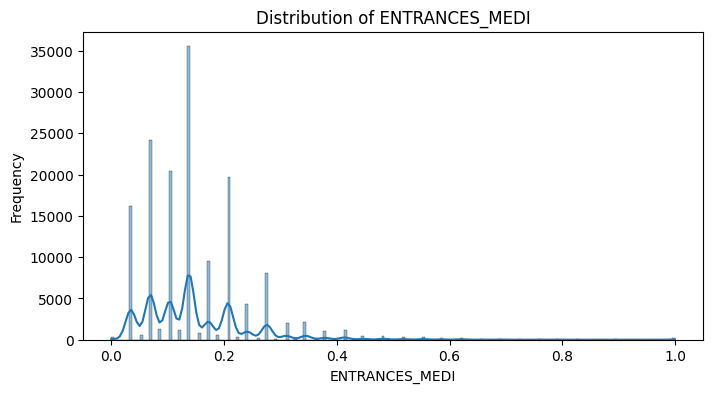

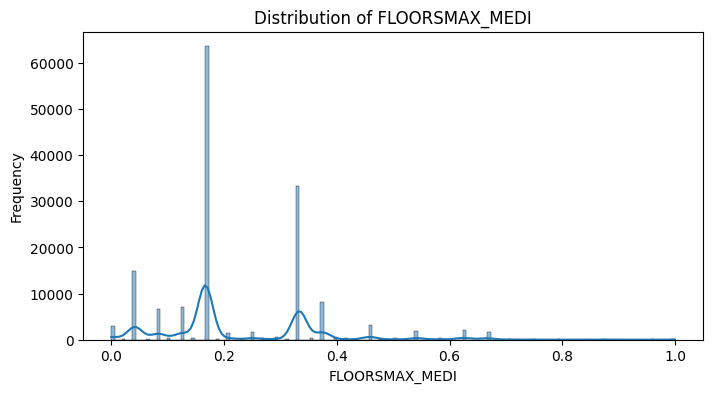

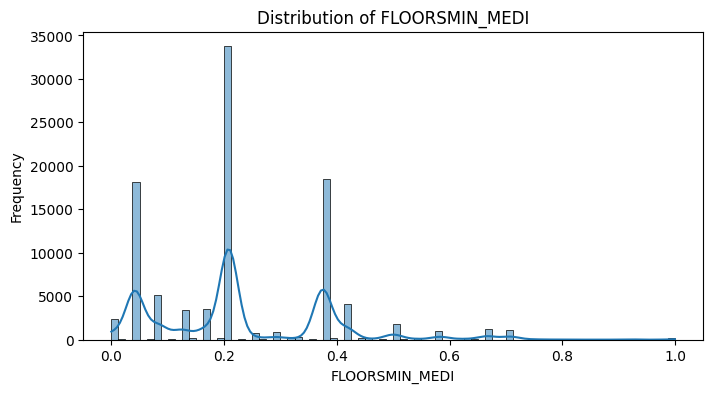

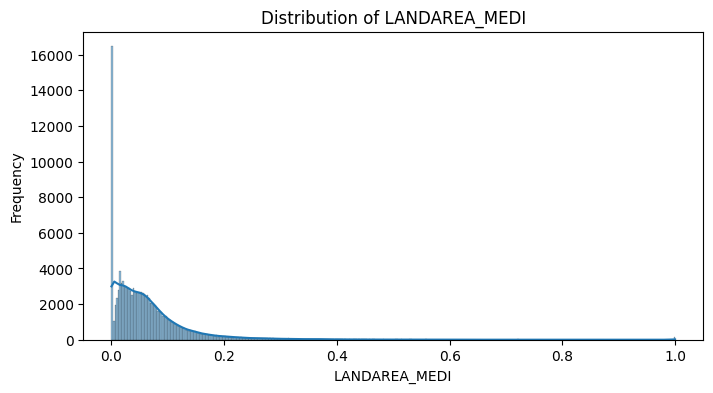

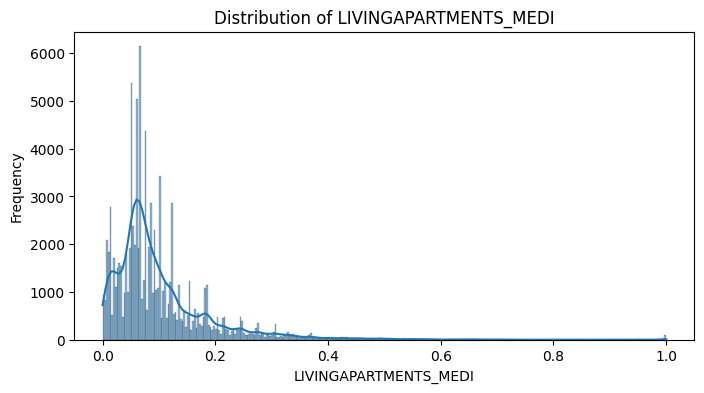

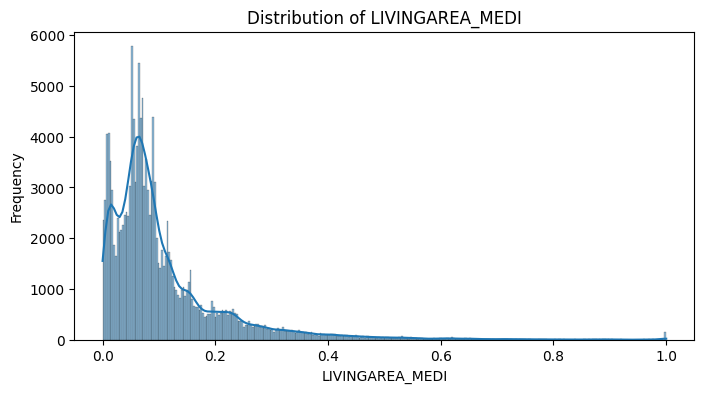

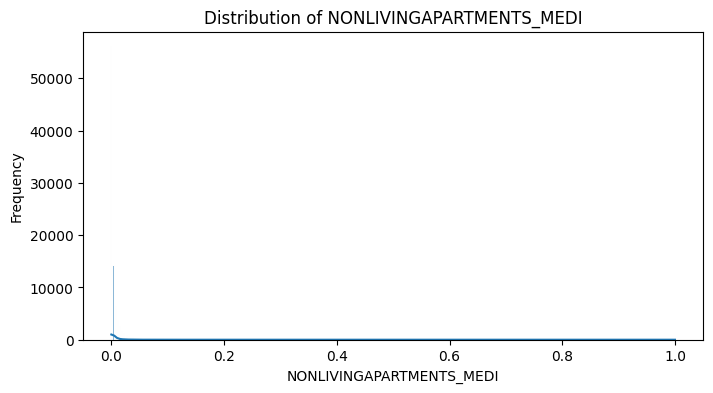

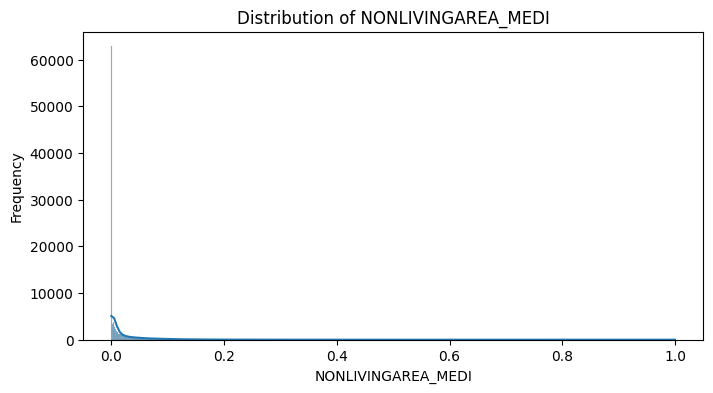

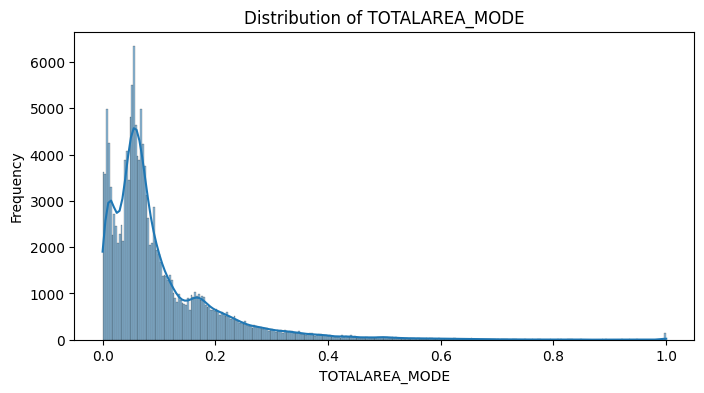

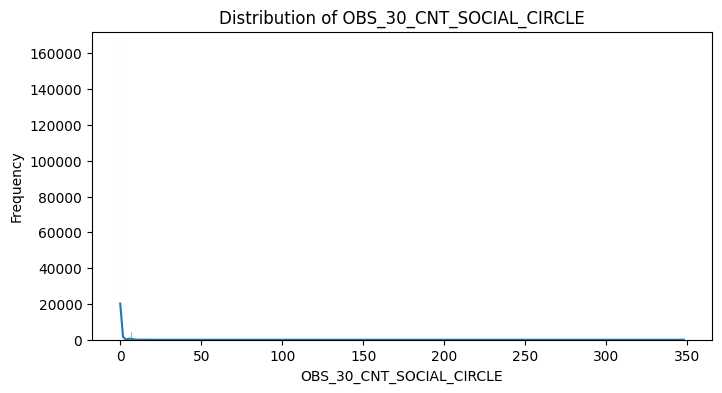

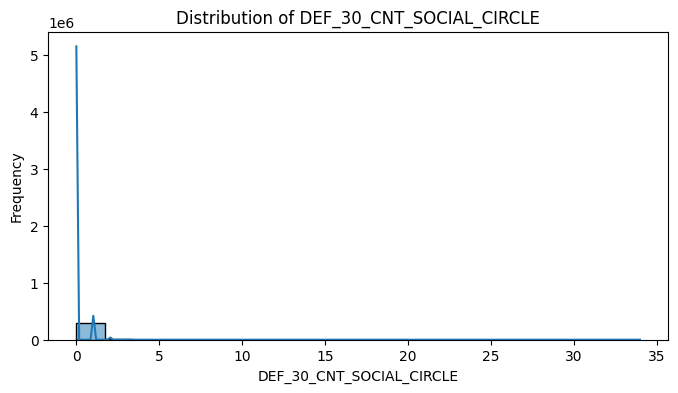

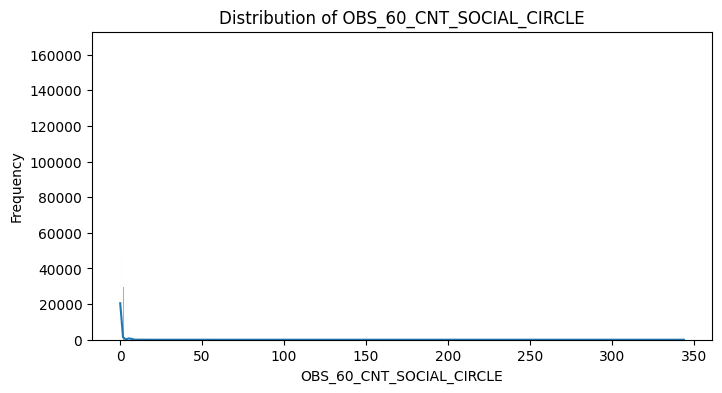

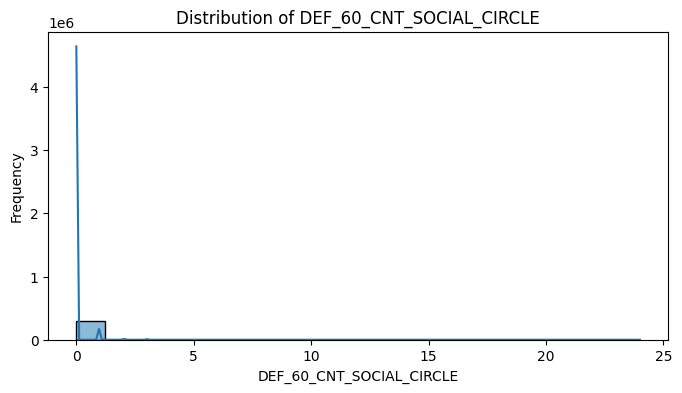

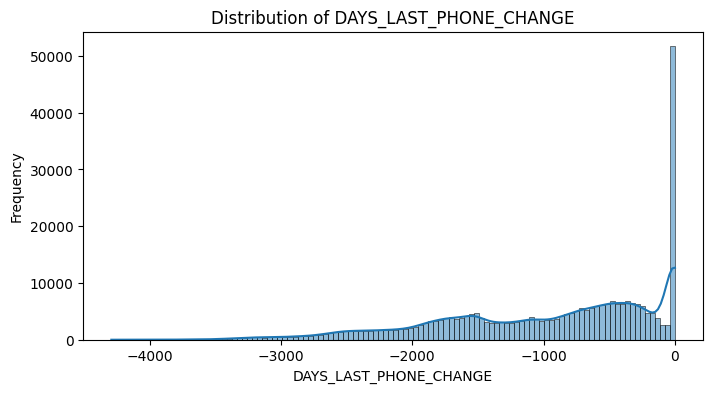

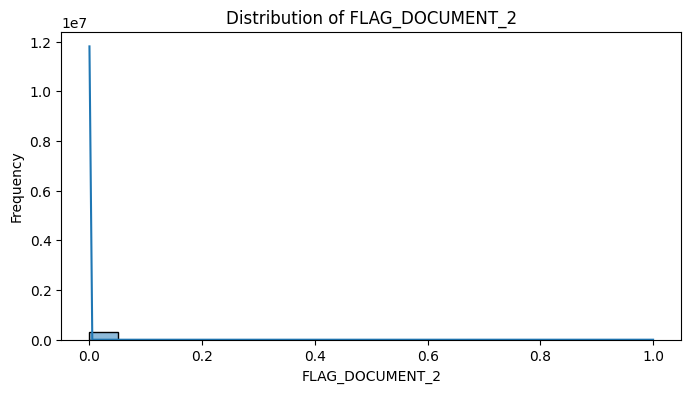

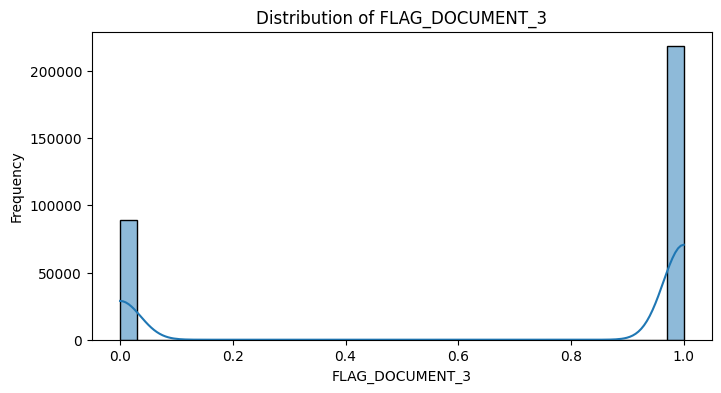

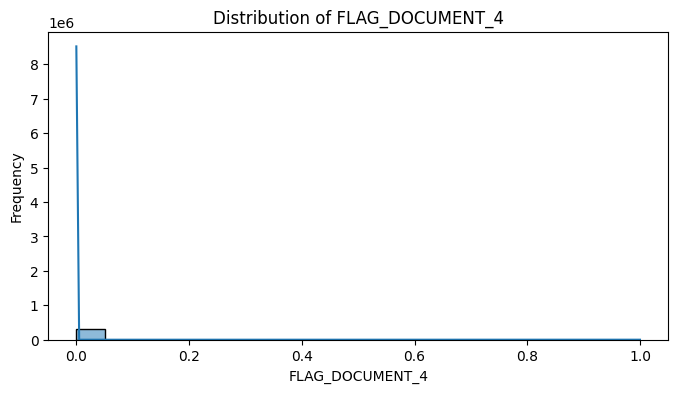

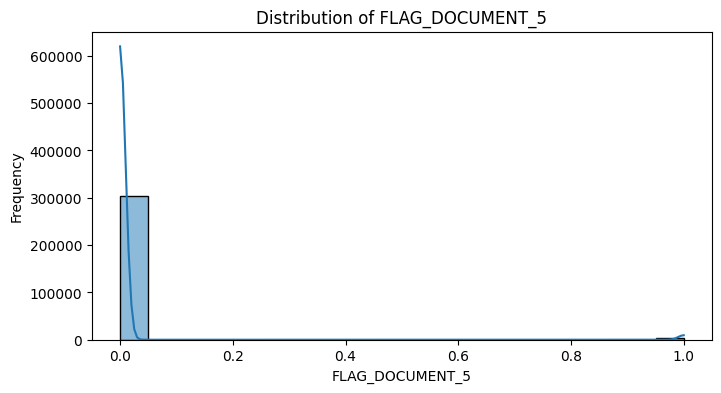

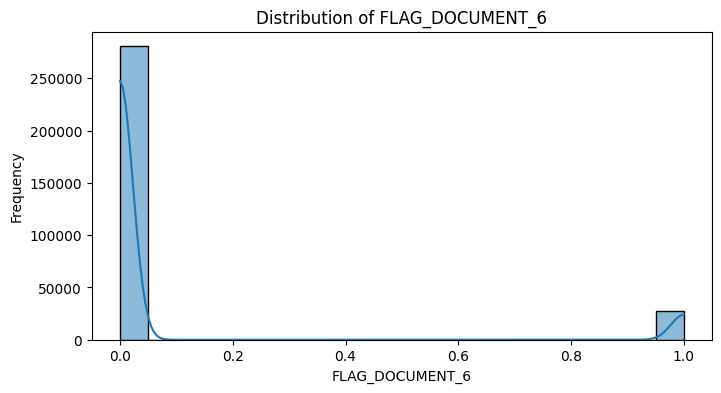

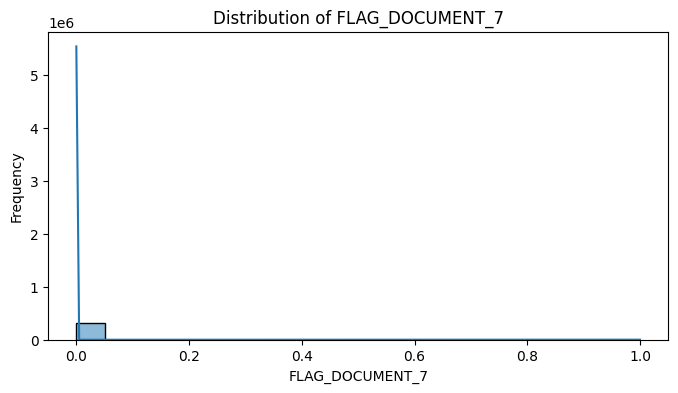

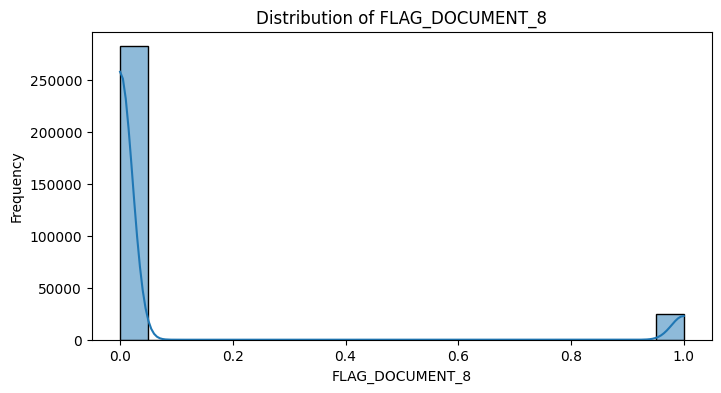

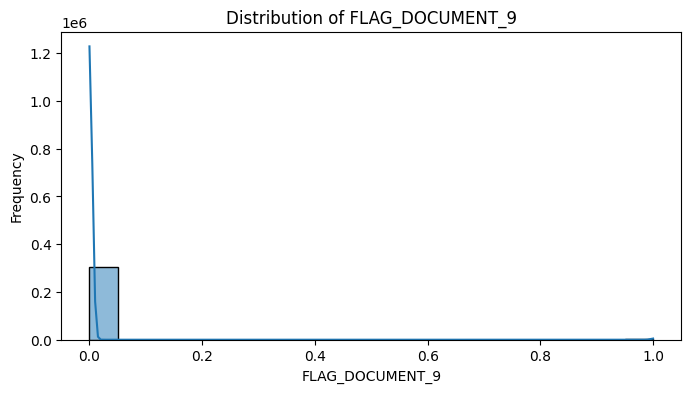

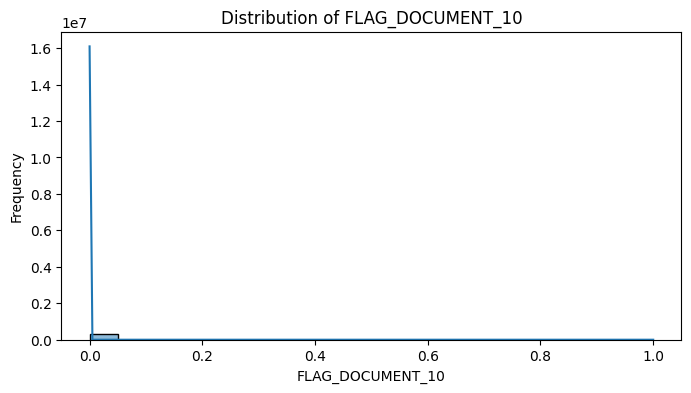

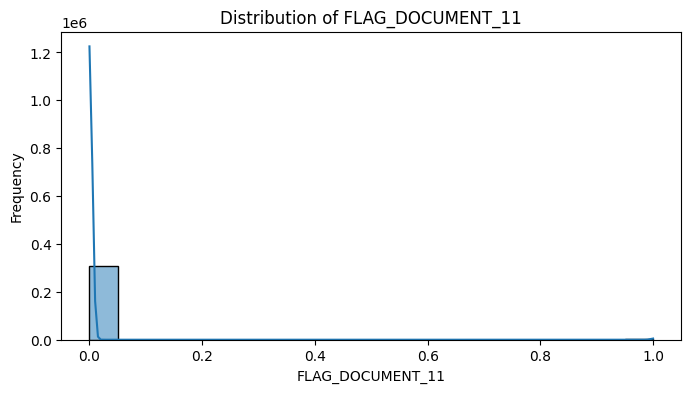

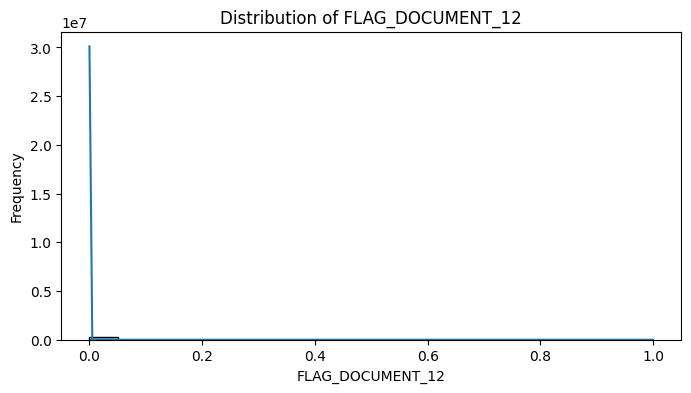

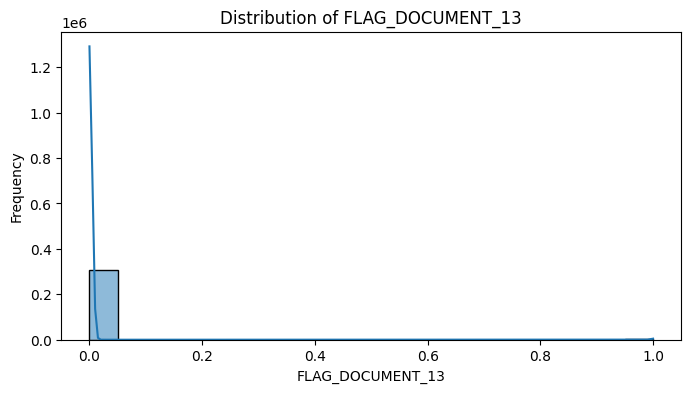

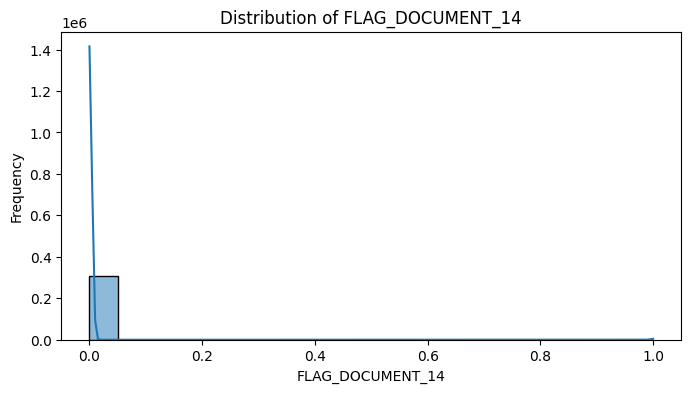

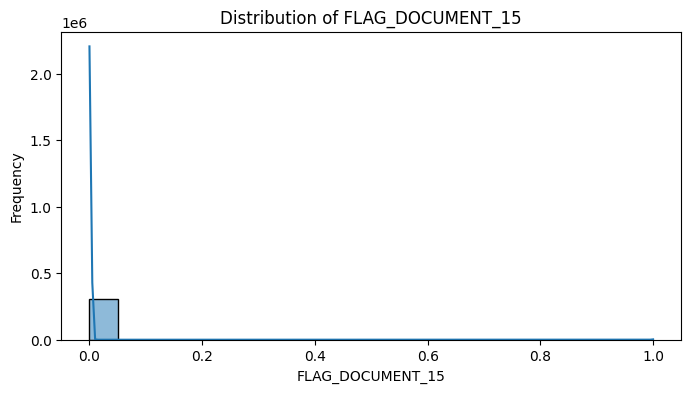

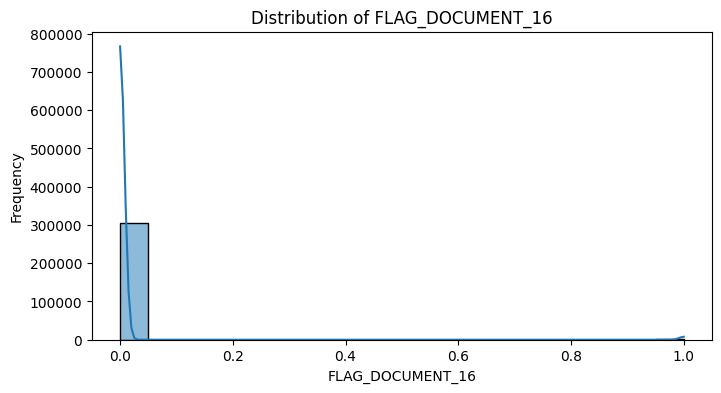

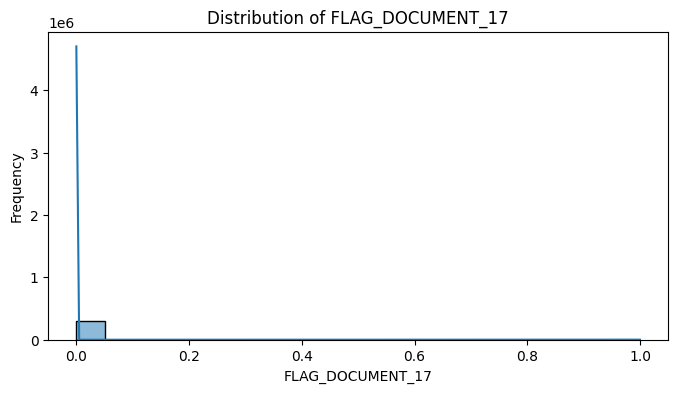

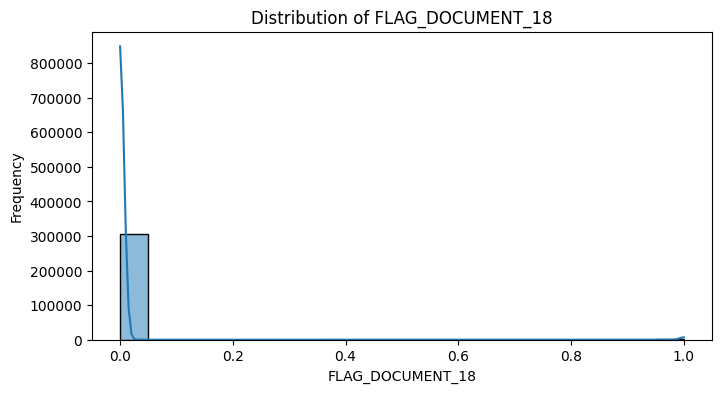

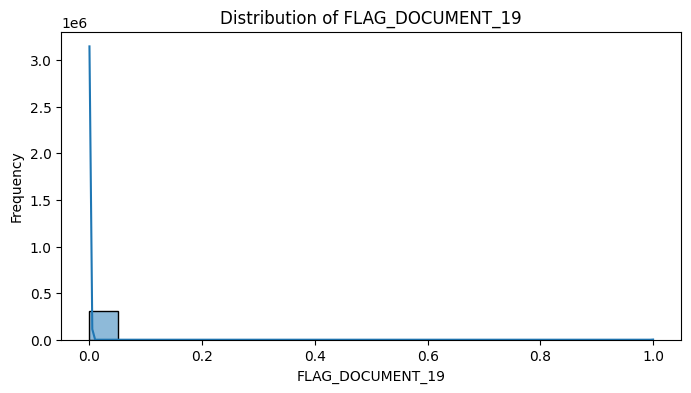

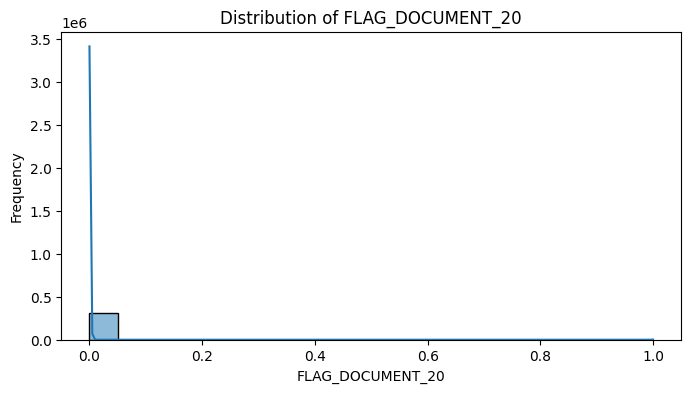

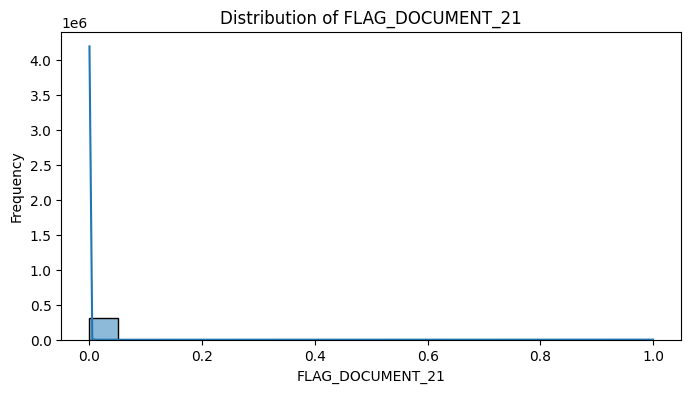

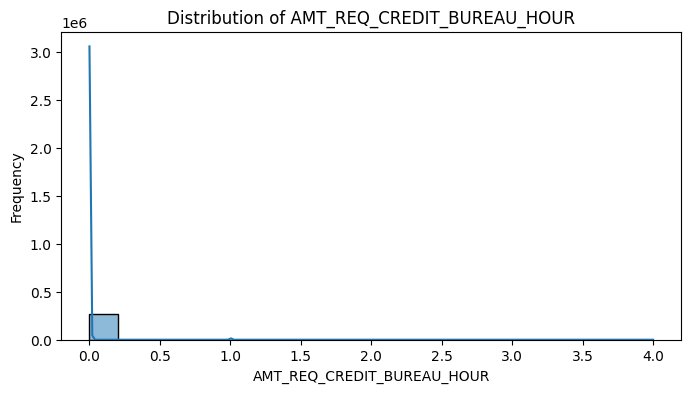

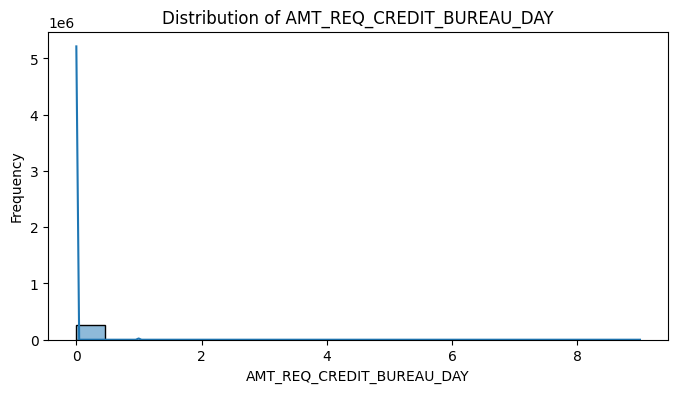

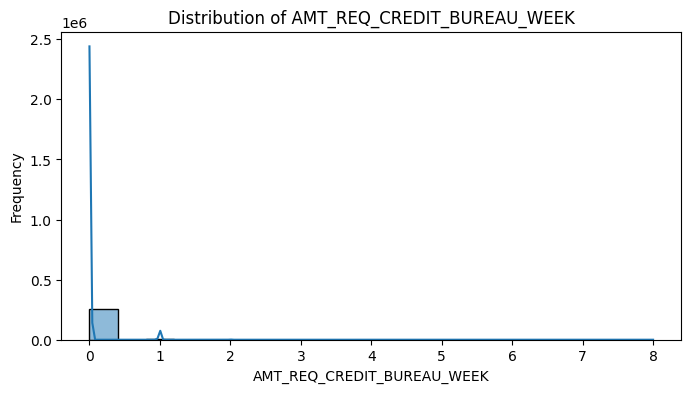

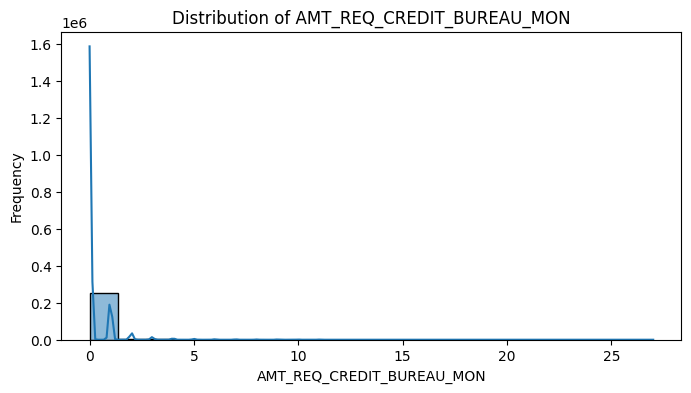

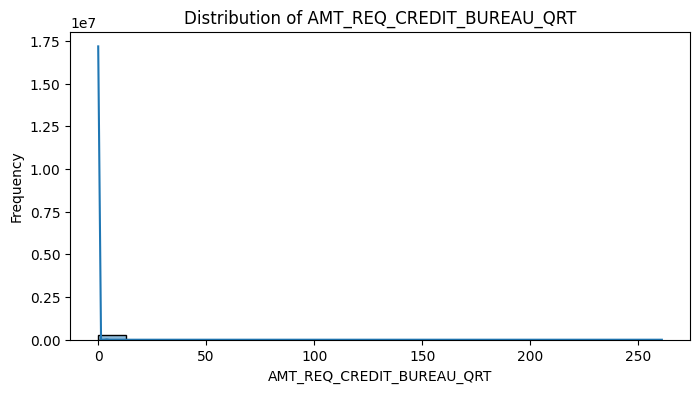

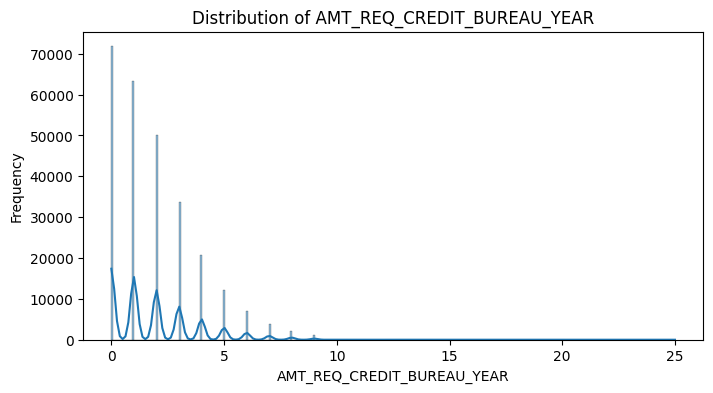

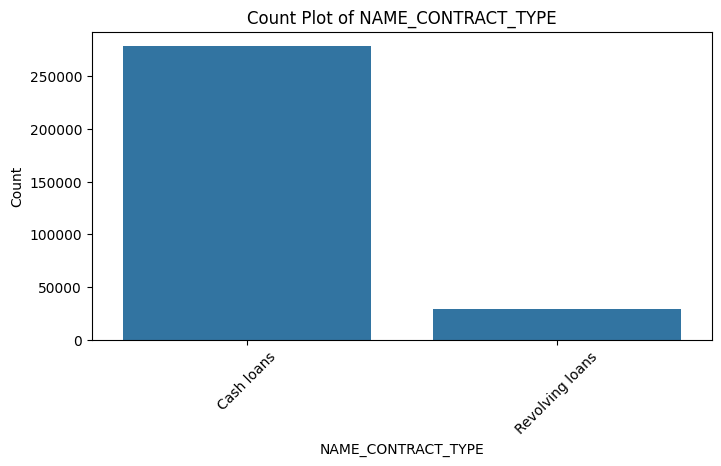

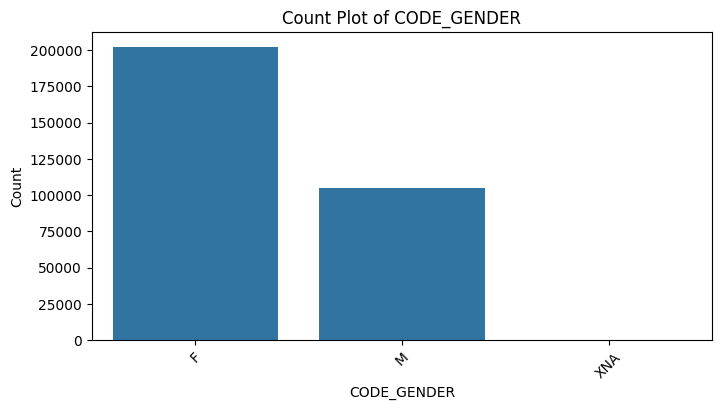

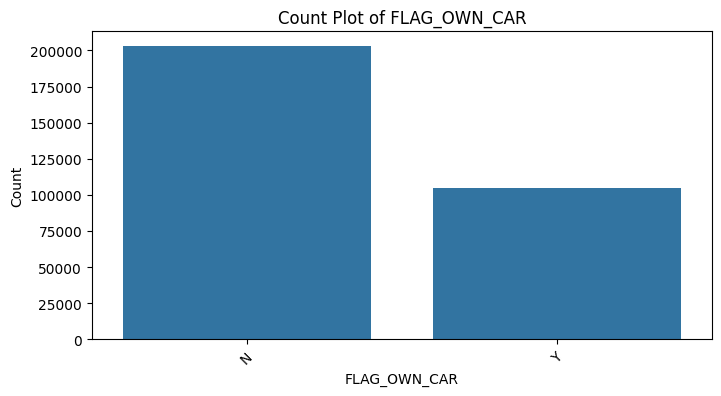

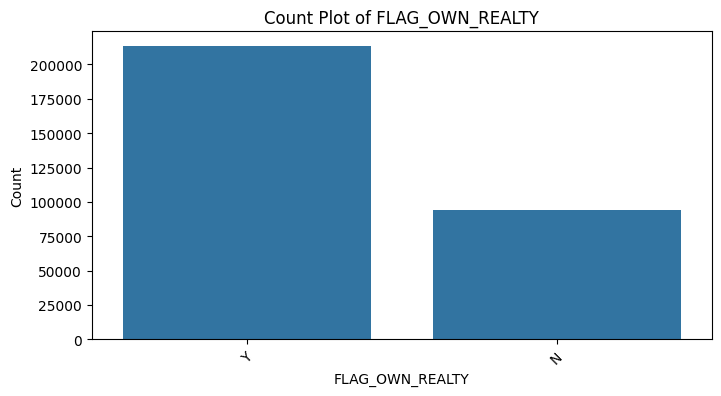

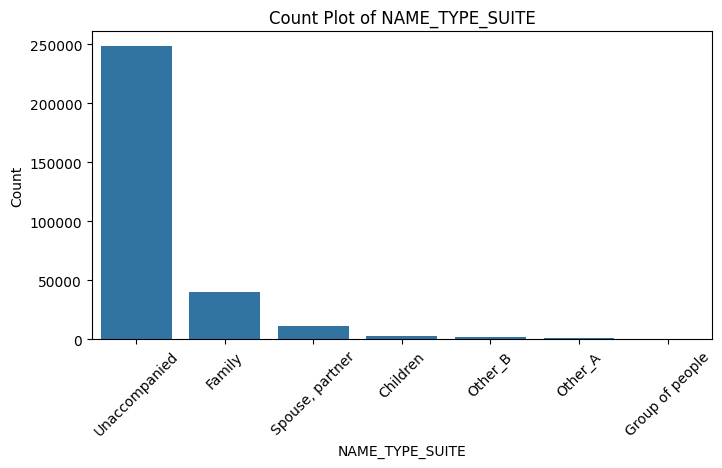

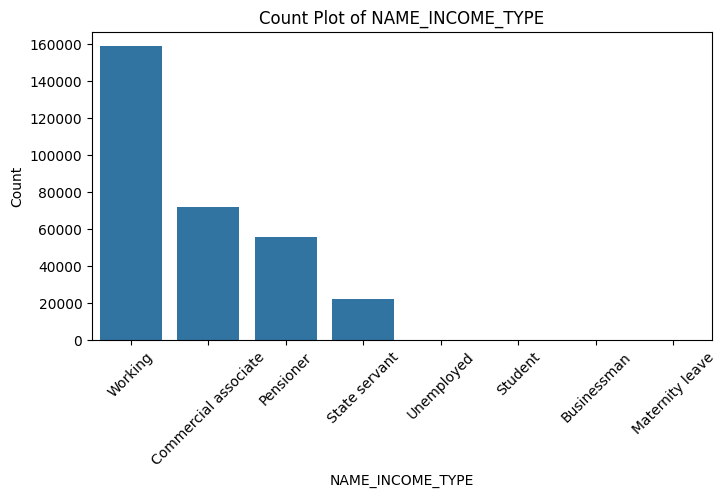

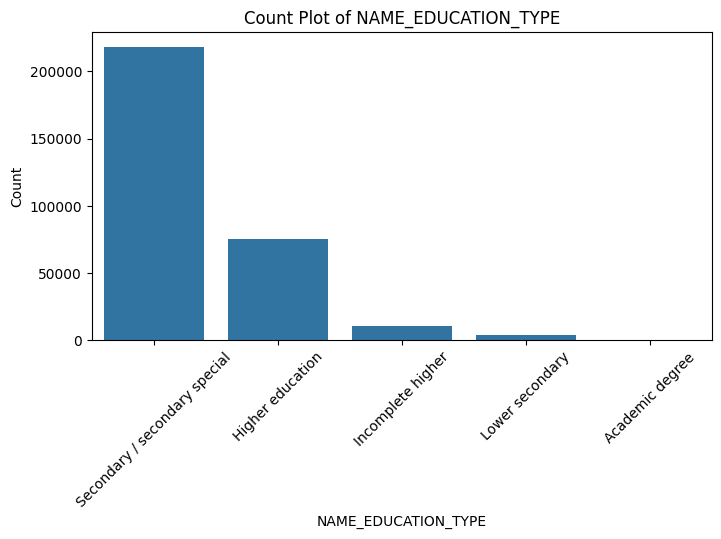

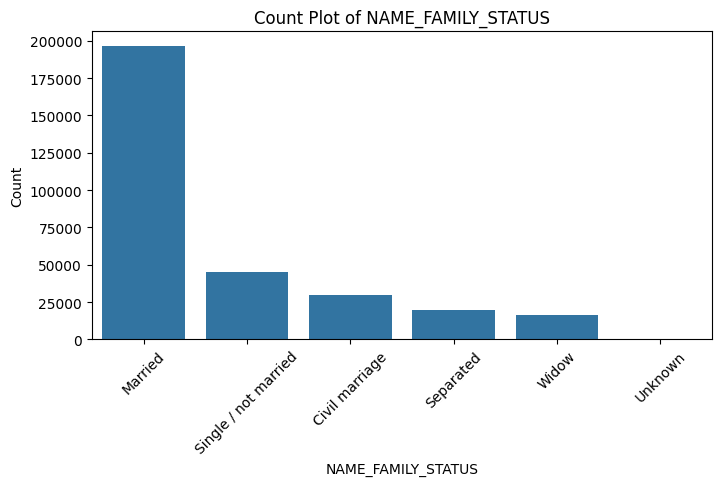

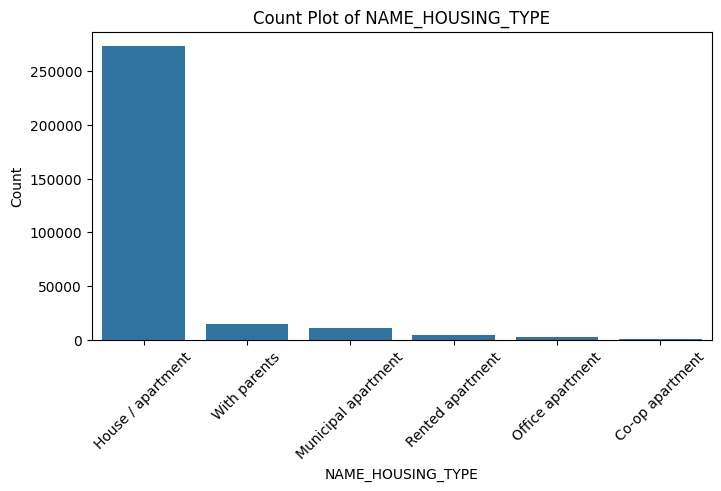

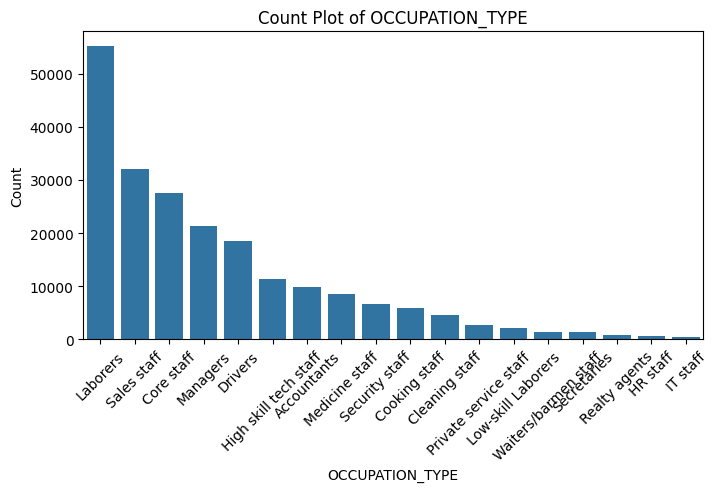

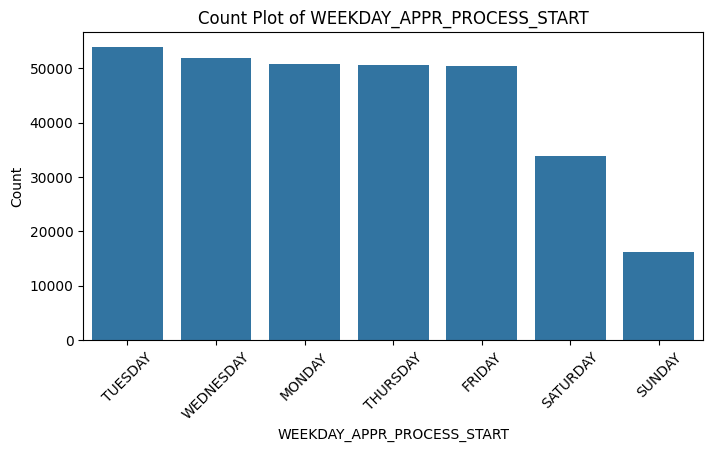

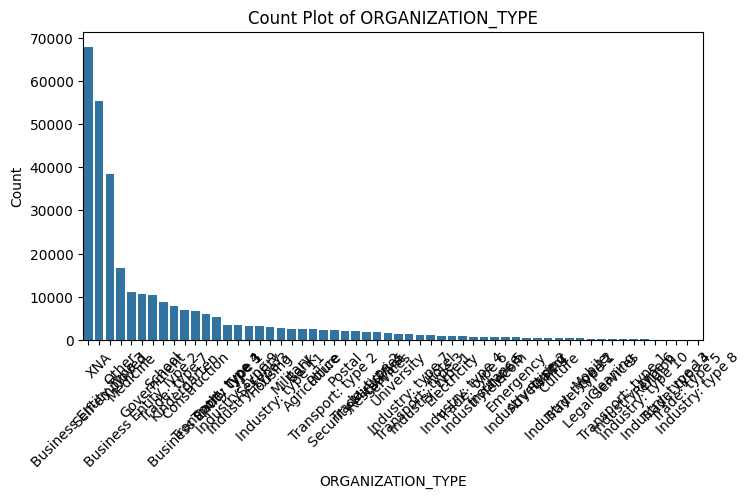

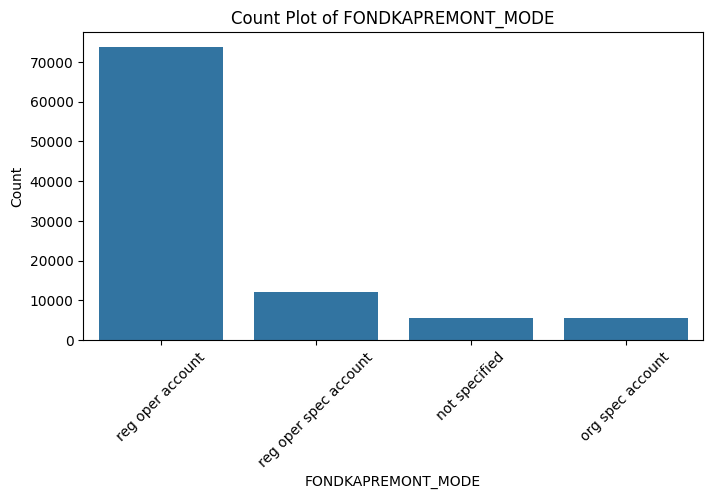

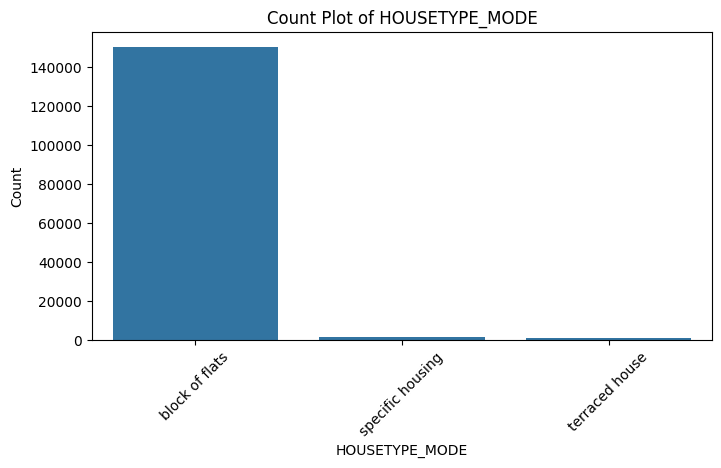

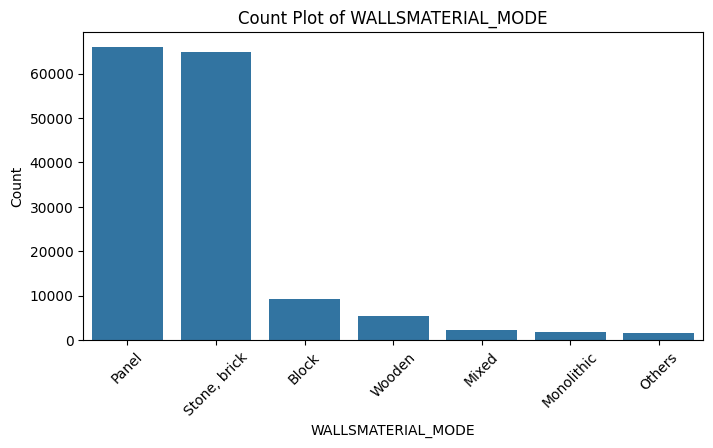

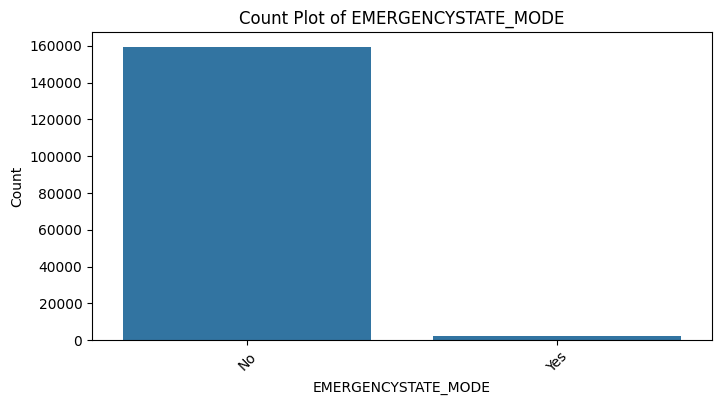

In [104]:
applicationPanda = app_raw.toPandas()
numeric_columns = applicationPanda.select_dtypes(include=[np.number]).columns
categorical_columns = applicationPanda.select_dtypes(exclude=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribution of {column}')
    sns.histplot(applicationPanda[column], kde=True)  # Create a histogram for numeric columns
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    plt.title(f'Count Plot of {column}')
    sns.countplot(data=applicationPanda, x=column, order=applicationPanda[column].value_counts().index)  # Create a count plot for categorical columns
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [105]:
column_name = "HOUR_APPR_PROCESS_START"
skewness_value = app_raw.select(skewness(column_name)).first()[0]
mean_value = app_raw.select(mean(column_name)).first()[0]

print(f"Skewness of '{column_name}': {skewness_value}")
print(f"Mean of '{column_name}': {mean_value}")


Skewness of 'HOUR_APPR_PROCESS_START': -0.02802432276069967
Mean of 'HOUR_APPR_PROCESS_START': 12.063418869568894


In [106]:
pd.set_option('display.max_columns', None)
applicationPanda.head(50)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0       100002       1         Cash loans           M            N  \
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0                Y             0        202500.000    406597.5      24700.5  \
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0      

<h2>Data prerperation</h2>

In [107]:
app_df = app_raw[['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
app_df.show()

+----------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+-----------------+---------------+-----------+---------------+---------------+--------------------------+-----------------------+--------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+
|SK_ID_CURR|NAME_CONTRACT_TYPE|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|AMT_CREDIT|AMT_ANNUITY|AMT_GOODS_PRICE|NAME_TYPE_SUITE|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|DAYS_REGISTRATION|DAYS_ID_PUBLISH|OWN_CAR_AGE|OCCUPATION_TYPE|CNT_FAM_MEMBERS|WEEKDAY_APPR_PROCESS_START|HOUR_APPR_PROCESS_START|   ORGANIZATION_TYPE|AMT_REQ_CREDIT

<h3>Find completness</h3>

In [108]:
def get_completeness(df_given):
    # Calculate completeness for each column
    completeness_data = []

    for column in df_given.columns:
        non_null_count = df_given.filter(col(column).isNotNull()).count()
        total_count = df_given.count()
        completeness = (non_null_count / total_count) * 100
        completeness_data.append((column, completeness))

    # Create a DataFrame to store the completeness results
    return spark.createDataFrame(completeness_data, ["Column", "Completeness"])


In [137]:
app_raw_completness = get_completeness(app_raw)

TypeError: 'str' object is not callable

In [139]:
app_raw_completness.show(100)

+--------------------+------------------+
|              Column|      Completeness|
+--------------------+------------------+
|          SK_ID_CURR|             100.0|
|              TARGET|             100.0|
|  NAME_CONTRACT_TYPE|             100.0|
|         CODE_GENDER|             100.0|
|        FLAG_OWN_CAR|             100.0|
|     FLAG_OWN_REALTY|             100.0|
|        CNT_CHILDREN|             100.0|
|    AMT_INCOME_TOTAL|             100.0|
|          AMT_CREDIT|             100.0|
|         AMT_ANNUITY| 99.99609770057006|
|     AMT_GOODS_PRICE| 99.90959672987307|
|     NAME_TYPE_SUITE| 99.57985242804322|
|    NAME_INCOME_TYPE|             100.0|
| NAME_EDUCATION_TYPE|             100.0|
|  NAME_FAMILY_STATUS|             100.0|
|   NAME_HOUSING_TYPE|             100.0|
|REGION_POPULATION...|             100.0|
|          DAYS_BIRTH|             100.0|
|       DAYS_EMPLOYED|             100.0|
|   DAYS_REGISTRATION|             100.0|
|     DAYS_ID_PUBLISH|            

In [110]:
app_df_completness = get_completeness(app_df)
prev_raw_completness = get_completeness(prev_raw)

In [111]:
app_df_completness.show(50)
prev_raw_completness.show()

+--------------------+------------------+
|              Column|      Completeness|
+--------------------+------------------+
|          SK_ID_CURR|             100.0|
|  NAME_CONTRACT_TYPE|             100.0|
|         CODE_GENDER|             100.0|
|        FLAG_OWN_CAR|             100.0|
|     FLAG_OWN_REALTY|             100.0|
|        CNT_CHILDREN|             100.0|
|    AMT_INCOME_TOTAL|             100.0|
|          AMT_CREDIT|             100.0|
|         AMT_ANNUITY| 99.99609770057006|
|     AMT_GOODS_PRICE| 99.90959672987307|
|     NAME_TYPE_SUITE| 99.57985242804322|
|    NAME_INCOME_TYPE|             100.0|
| NAME_EDUCATION_TYPE|             100.0|
|  NAME_FAMILY_STATUS|             100.0|
|   NAME_HOUSING_TYPE|             100.0|
|          DAYS_BIRTH|             100.0|
|       DAYS_EMPLOYED|             100.0|
|   DAYS_REGISTRATION|             100.0|
|     DAYS_ID_PUBLISH|             100.0|
|         OWN_CAR_AGE|34.009189915157506|
|     OCCUPATION_TYPE| 68.65445463

<h3>Fill incomplete columns</h3>

In [112]:
fill_values = {"NAME_TYPE_SUITE" : "None",
                "OCCUPATION_TYPE" : "Unknown",
                'OWN_CAR_AGE' : 0,'CNT_FAM_MEMBERS' : 0,
                'AMT_ANNUITY' : 0,'AMT_GOODS_PRICE' : 0,
                'AMT_REQ_CREDIT_BUREAU_HOUR' : 0,
                'AMT_REQ_CREDIT_BUREAU_DAY' : 0,
                'AMT_REQ_CREDIT_BUREAU_WEEK' : 0,
                'AMT_REQ_CREDIT_BUREAU_MON' : 0,
                'AMT_REQ_CREDIT_BUREAU_QRT' : 0,
                'AMT_REQ_CREDIT_BUREAU_YEAR' : 0}
app_df_complete = app_df.fillna(fill_values)
completness_check = get_completeness(app_df_complete)

In [113]:
completness_check.show(50)

+--------------------+------------+
|              Column|Completeness|
+--------------------+------------+
|          SK_ID_CURR|       100.0|
|  NAME_CONTRACT_TYPE|       100.0|
|         CODE_GENDER|       100.0|
|        FLAG_OWN_CAR|       100.0|
|     FLAG_OWN_REALTY|       100.0|
|        CNT_CHILDREN|       100.0|
|    AMT_INCOME_TOTAL|       100.0|
|          AMT_CREDIT|       100.0|
|         AMT_ANNUITY|       100.0|
|     AMT_GOODS_PRICE|       100.0|
|     NAME_TYPE_SUITE|       100.0|
|    NAME_INCOME_TYPE|       100.0|
| NAME_EDUCATION_TYPE|       100.0|
|  NAME_FAMILY_STATUS|       100.0|
|   NAME_HOUSING_TYPE|       100.0|
|          DAYS_BIRTH|       100.0|
|       DAYS_EMPLOYED|       100.0|
|   DAYS_REGISTRATION|       100.0|
|     DAYS_ID_PUBLISH|       100.0|
|         OWN_CAR_AGE|       100.0|
|     OCCUPATION_TYPE|       100.0|
|     CNT_FAM_MEMBERS|       100.0|
|WEEKDAY_APPR_PROC...|       100.0|
|HOUR_APPR_PROCESS...|       100.0|
|   ORGANIZATION_TYPE|      

In [114]:
app_df = app_df_complete

<h3>Day values</h3>

In [115]:
columns_to_multiply = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for col_name in columns_to_multiply:
    app_df = app_df.withColumn(col_name, when(col(col_name) < 0, col(col_name) * -1).otherwise(col(col_name)))
app_df.show()

+----------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+-----------------+---------------+-----------+---------------+---------------+--------------------------+-----------------------+--------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+
|SK_ID_CURR|NAME_CONTRACT_TYPE|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|AMT_CREDIT|AMT_ANNUITY|AMT_GOODS_PRICE|NAME_TYPE_SUITE|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|DAYS_REGISTRATION|DAYS_ID_PUBLISH|OWN_CAR_AGE|OCCUPATION_TYPE|CNT_FAM_MEMBERS|WEEKDAY_APPR_PROCESS_START|HOUR_APPR_PROCESS_START|   ORGANIZATION_TYPE|AMT_REQ_CREDIT

<h3>Renaming columns</h3>

In [116]:
app_df_renamed= app_df.withColumnRenamed('NAME_CONTRACT_TYPE', 'CONTRACT_TYPE') \
    .withColumnRenamed('CODE_GENDER', 'GENDER') \
    .withColumnRenamed('FLAG_OWN_CAR', 'OWN_CAR') \
    .withColumnRenamed('FLAG_OWN_REALTY', 'OWN_REALTY') \
    .withColumnRenamed('CNT_CHILDREN', 'NUMBER_CHILDREN') \
    .withColumnRenamed('AMT_INCOME_TOTAL', 'AMT_INCOME_TOTAL') \
    .withColumnRenamed('AMT_CREDIT', 'AMT_CREDIT') \
    .withColumnRenamed('AMT_ANNUITY', 'AMT_ANNUITY') \
    .withColumnRenamed('AMT_GOODS_PRICE', 'AMT_GOODS_PRICE') \
    .withColumnRenamed('NAME_TYPE_SUITE', 'REFERENCE_TYPE') \
    .withColumnRenamed('NAME_INCOME_TYPE', 'INCOME_TYPE') \
    .withColumnRenamed('NAME_EDUCATION_TYPE', 'EDUCATION_TYPE') \
    .withColumnRenamed('NAME_FAMILY_STATUS', 'FAMILY_STATUS') \
    .withColumnRenamed('NAME_HOUSING_TYPE', 'HOUSING_TYPE') \
    .withColumnRenamed('REGION_POPULATION_RELATIVE', 'REGION_POPULATION_RELATIVE') \
    .withColumnRenamed('DAYS_BIRTH', 'DAYS_BIRTH') \
    .withColumnRenamed('DAYS_EMPLOYED', 'DAYS_EMPLOYED') \
    .withColumnRenamed('DAYS_REGISTRATION', 'DAYS_REGISTRATION') \
    .withColumnRenamed('DAYS_ID_PUBLISH', 'DAYS_ID_PUBLISH') \
    .withColumnRenamed('OWN_CAR_AGE', 'CAR_AGE') \
    .withColumnRenamed('OCCUPATION_TYPE', 'OCCUPATION_TYPE') \
    .withColumnRenamed('CNT_FAM_MEMBERS', 'NUMBER_OF_FAM_MEMBERS') \
    .withColumnRenamed('WEEKDAY_APPR_PROCESS_START', 'WEEKDAY_PROCESS_START') \
    .withColumnRenamed('HOUR_APPR_PROCESS_START', 'HOUR_PROCESS_START') \
    .withColumnRenamed('ORGANIZATION_TYPE', 'ORGANIZATION_TYPE') \
    .withColumnRenamed('AMT_REQ_CREDIT_BUREAU_HOUR', 'CREDIT_INQUIRY_HOUR_PRIOR') \
    .withColumnRenamed('AMT_REQ_CREDIT_BUREAU_DAY', 'CREDIT_INQUIRY_DAY_PRIOR') \
    .withColumnRenamed('AMT_REQ_CREDIT_BUREAU_WEEK', 'CREDIT_INQUIRY_WEEK_PRIOR') \
    .withColumnRenamed('AMT_REQ_CREDIT_BUREAU_MON', 'CREDIT_INQUIRY_MONTH_PRIOR') \
    .withColumnRenamed('AMT_REQ_CREDIT_BUREAU_YEAR', 'CREDIT_INQUIRY_YEAR_PRIOR') \
    .withColumnRenamed('AMT_REQ_CREDIT_BUREAU_QRT', 'CREDIT_INQUIRY_QTR_PRIOR') 

In [117]:
app_df_renamed.show()

+----------+---------------+------+-------+----------+---------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+-----------------+---------------+-------+---------------+---------------------+---------------------+------------------+--------------------+-------------------------+------------------------+-------------------------+--------------------------+------------------------+-------------------------+
|SK_ID_CURR|  CONTRACT_TYPE|GENDER|OWN_CAR|OWN_REALTY|NUMBER_CHILDREN|AMT_INCOME_TOTAL|AMT_CREDIT|AMT_ANNUITY|AMT_GOODS_PRICE| REFERENCE_TYPE|         INCOME_TYPE|      EDUCATION_TYPE|       FAMILY_STATUS|     HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|DAYS_REGISTRATION|DAYS_ID_PUBLISH|CAR_AGE|OCCUPATION_TYPE|NUMBER_OF_FAM_MEMBERS|WEEKDAY_PROCESS_START|HOUR_PROCESS_START|   ORGANIZATION_TYPE|CREDIT_INQUIRY_HOUR_PRIOR|CREDIT_INQUIRY_DAY_PRIOR|CREDIT_INQUIR

<h3>Make year values</h3>

In [118]:
columns_to_multiply = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for col_name in columns_to_multiply:
    app_df = app_df.withColumn(col_name+"_IN_YEARS", col(col_name)/365)

In [119]:
app_df['DAYS_BIRTH_IN_YEARS', 'DAYS_EMPLOYED_IN_YEARS', 'DAYS_REGISTRATION_IN_YEARS', 'DAYS_ID_PUBLISH_IN_YEARS'].show()

+-------------------+----------------------+--------------------------+------------------------+
|DAYS_BIRTH_IN_YEARS|DAYS_EMPLOYED_IN_YEARS|DAYS_REGISTRATION_IN_YEARS|DAYS_ID_PUBLISH_IN_YEARS|
+-------------------+----------------------+--------------------------+------------------------+
|  25.92054794520548|    1.7452054794520548|         9.994520547945205|       5.808219178082192|
|  45.93150684931507|     3.254794520547945|         3.249315068493151|      0.7972602739726027|
|  52.18082191780822|    0.6164383561643836|         11.67123287671233|       6.934246575342466|
|  52.06849315068493|     8.326027397260274|         26.93972602739726|       6.676712328767123|
| 54.608219178082194|     8.323287671232876|        11.810958904109588|       9.473972602739726|
| 46.413698630136984|      4.35068493150685|        13.616438356164384|      1.3068493150684932|
|  37.74794520547945|     8.575342465753424|        3.3232876712328765|      1.6958904109589041|
|  51.64383561643836|    1.230

<h2>Data intergration</h2>

In [120]:
#Aggegate the dataset
grouped = prev_raw.groupBy("SK_ID_CURR")
prev_df = grouped.agg(count("*").alias("count"))

In [121]:
#Merge datasets on SK_ID_CURR
merged_df = app_df.join(prev_df, on="SK_ID_CURR", how="inner")

<h2>Split training set</h2>

In [122]:
#Split merged data frame into training and testing set by a ratio of 70% : 30%
train_ratio = 0.7
test_ratio = 1 - train_ratio
train_df, test_df = merged_df.randomSplit([train_ratio, test_ratio], seed=42)

print("Training Set:")
train_df.show()

print("Testing Set:")
test_df.show()

Training Set:
+----------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+-----------------+---------------+-----------+--------------------+---------------+--------------------------+-----------------------+--------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+-------------------+----------------------+--------------------------+------------------------+-----+
|SK_ID_CURR|NAME_CONTRACT_TYPE|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|AMT_CREDIT|AMT_ANNUITY|AMT_GOODS_PRICE|NAME_TYPE_SUITE|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|DAYS_REGISTRATION|DAYS_ID_PUBLISH|OWN_CAR_AG

In [123]:
data = train_df

<h2>Data mining</h2>

<h3>FP Growth</h3>

In [124]:
columns_to_combine=['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_BIRTH_IN_YEARS','DAYS_EMPLOYED_IN_YEARS','DAYS_REGISTRATION_IN_YEARS','DAYS_ID_PUBLISH_IN_YEARS','count']

df_with_list = data.withColumn( "transaction",
    array(*[concat(lit(column + ': '), col(column)) for column in columns_to_combine])
)

df_with_list = df_with_list[['SK_ID_CURR', 'transaction']]

df_with_list.show(truncate=False)


+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [125]:
fp_growth = FPGrowth(itemsCol="transaction", minSupport=0.4, minConfidence=0.7)

model = fp_growth.fit(df_with_list)

In [126]:
# Display frequent itemsets
print("Frequent Itemsets:")
model.freqItemsets.show(truncate=True)

# Display association rules
print("\nAssociation Rules:")
rules = model.associationRules
model.associationRules.show(50, truncate=False)

Frequent Itemsets:
+--------------------+------+
|               items|  freq|
+--------------------+------+
|[NAME_EDUCATION_T...|130067|
|[NAME_EDUCATION_T...|125820|
|[NAME_EDUCATION_T...|125070|
|[NAME_EDUCATION_T...|124624|
|[NAME_EDUCATION_T...|125193|
|[NAME_EDUCATION_T...|109549|
|[NAME_EDUCATION_T...|105751|
|[NAME_EDUCATION_T...|105113|
|[NAME_EDUCATION_T...|104718|
|[NAME_EDUCATION_T...|105204|
|[NAME_EDUCATION_T...| 97800|
|[NAME_EDUCATION_T...| 94374|
|[NAME_EDUCATION_T...| 93832|
|[NAME_EDUCATION_T...| 93481|
|[NAME_EDUCATION_T...| 93897|
|[NAME_EDUCATION_T...| 97234|
|[NAME_EDUCATION_T...| 96811|
|[NAME_EDUCATION_T...| 89515|
|[NAME_EDUCATION_T...| 86305|
|[NAME_EDUCATION_T...| 85805|
+--------------------+------+
only showing top 20 rows


Association Rules:
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h3>Visualise FP-Growth</h3>

In [127]:
# Calculate the number of items in antecedents and filter
rules = rules.withColumn('lhs_items', size(col('antecedent')))
rules_filtered = rules.filter(rules['lhs_items'] > 1.4)

# # Sort by 'lift' in descending order
sorted_rules = rules_filtered.orderBy(col('lift').desc())

# # Show the top results
sorted_rules.toPandas().head()

# # Replace frozen sets with strings
rules_replaced = rules_filtered.withColumn('antecedent_', concat_ws(',', 'antecedent'))
rules_replaced = rules_replaced.withColumn('consequent_', concat_ws(',', 'consequent'))

In [128]:
pd.set_option('display.max_colwidth', None)
sorted_rules.toPandas().head(50)


antecedent   
0                                                                                                                              [NAME_FAMILY_STATUS: Married, CNT_CHILDREN: 0, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0]  \
1                                                                                                                                                               [NAME_FAMILY_STATUS: Married, CNT_CHILDREN: 0]   
2                                                                                                                               [NAME_FAMILY_STATUS: Married, CNT_CHILDREN: 0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
3                                                                                              [NAME_FAMILY_STATUS: Married, CNT_CHILDREN: 0, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
4                                                                                                                              [NAME_FAMILY_STATUS: Married, CNT_CHILDREN: 0, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0]   
5                                                                                                          [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0]   
6                                                                          [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
7                                                                                                                                           [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans]   
8                                                                                                           [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
9                                                                          [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
10                                                                                                         [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0]   
11                                                                        [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0]   
12                                                                                                                                          [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_TYPE_SUITE: Unaccompanied]   
13                                        [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_CONTRACT_TYPE: Cash loans, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
14                                                                                                         [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_TYPE_SUITE: Unaccompanied, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0]   
15                                                                         [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_TYPE_SUITE: Unaccompanied, AMT_REQ_CREDIT_BUREAU_HOUR: 0.0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
16                                                                                                          [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_TYPE_SUITE: Unaccompanied, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]   
17                                                                                                         [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_TYPE_SUITE: Unaccompanied, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0]   
18                                                                         [OWN_CAR_AGE: 0.0, CODE_GENDER: F, NAME_TYPE_SUITE: Unaccompanied, AMT_REQ_CREDIT_BUREAU_WEEK: 0.0, AMT_REQ_CREDIT_BUREAU_DAY: 0.0]

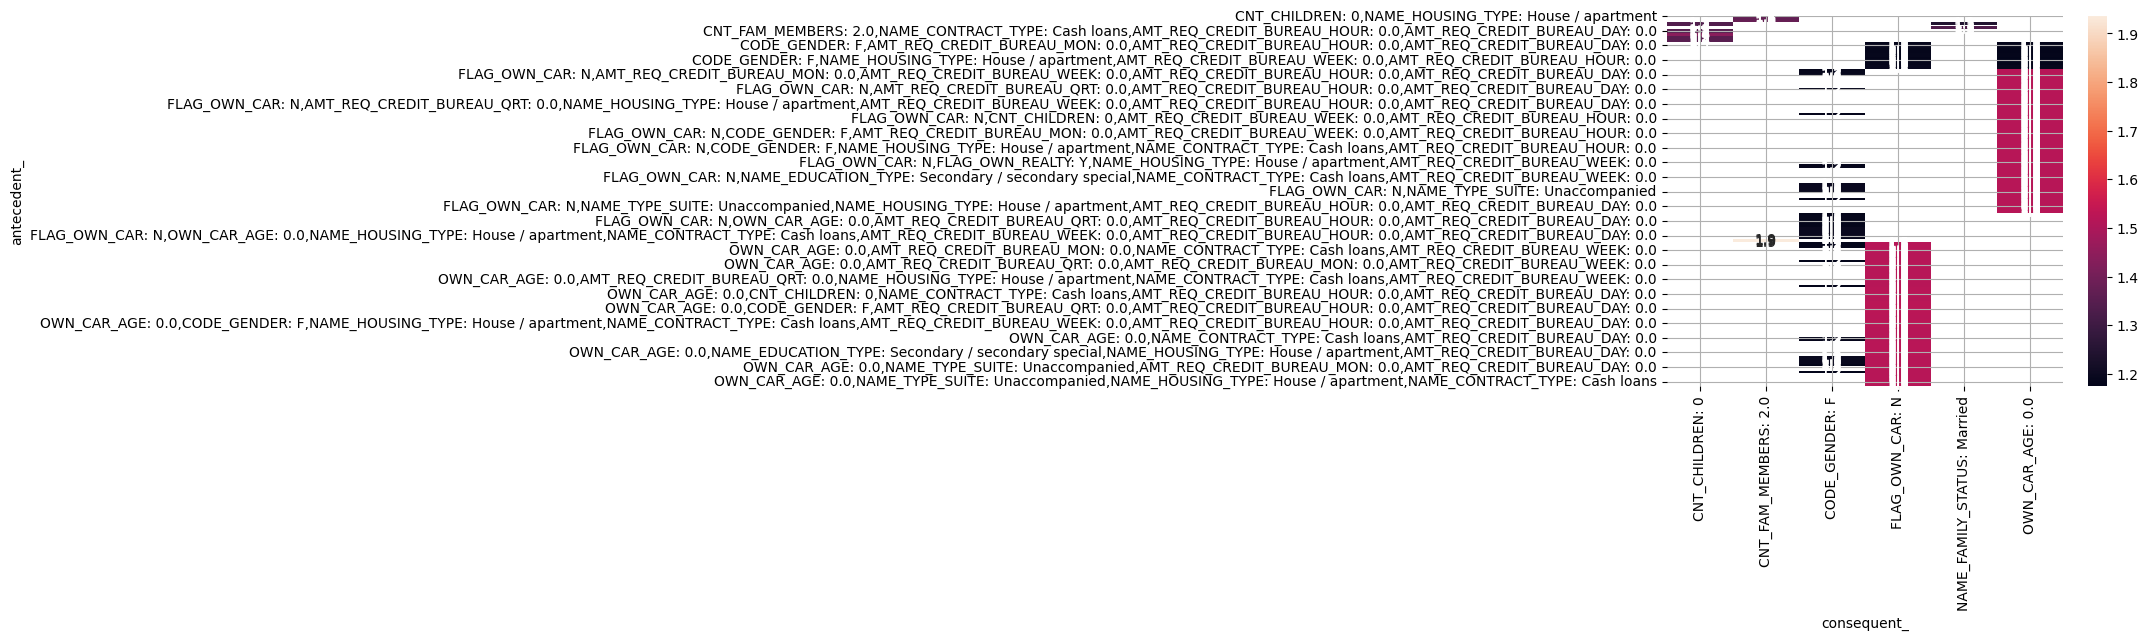

In [129]:
rules_df = rules_replaced.toPandas()
rules_df = rules_df[rules_df['lift']>1.1]
pivot = rules_df[rules_df['lhs_items']>1.4].pivot(index = 'antecedent_', 
                    columns = 'consequent_', values= 'lift')
# Generate a heatmap with annotations on
sns.heatmap(pivot, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [130]:
# Find the statistics
max_support = rules_filtered.agg({"support": "max"}).collect()[0][0]
min_support = rules_filtered.agg({"support": "min"}).collect()[0][0]
max_confidence = rules_filtered.agg({"confidence": "max"}).collect()[0][0]
min_confidence = rules_filtered.agg({"confidence": "min"}).collect()[0][0]
max_lift = rules_filtered.agg({"lift": "max"}).collect()[0][0]
min_lift = rules_filtered.agg({"lift": "min"}).collect()[0][0]

print(f"Maximum Support: {max_support:.4f}")
print(f"Minimum Support: {min_support:.4f}")
print(f"Maximum Confidence: {max_confidence:.4f}")
print(f"Minimum Confidence: {min_confidence:.4f}")
print(f"Maximum Lift: {max_lift:.4f}")
print(f"Minimum Lift: {min_lift:.4f}")

Maximum Support: 0.9585
Minimum Support: 0.4002
Maximum Confidence: 1.0000
Minimum Confidence: 0.7000
Maximum Lift: 1.9356
Minimum Lift: 0.9658


<h3>K - means</h3>

In [131]:
# Load your data into a DataFrame
data = train_df

# Identify non-numeric columns
non_numeric_cols = [col for col, dtype in data.dtypes if dtype == 'string']

# Create stages for one-hot encoding
stages = []

for col in non_numeric_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_index")
    encoder = OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded")
    stages += [indexer, encoder]

# Assemble feature vectors
feature_cols = [col + "_encoded" for col in non_numeric_cols] + [col for col in data.columns if col not in non_numeric_cols]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
stages += [assembler]

# Create a pipeline
pipeline = Pipeline(stages=stages)
model = pipeline.fit(data)
data_transformed = model.transform(data)

# Select the relevant columns
selected_columns = ["features"] + [col for col in data.columns if col not in non_numeric_cols]
data_transformed = data_transformed.select(selected_columns)

# Show the transformed DataFrame
data_transformed.show(truncate=False)



+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------+----------------+----------+-----------+---------------+----------+-------------+-----------------+---------------+-----------+---------------+-----------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+-------------------+----------------------+--------------------------+------------------------+-----+
|features                                                                                                                                                                                                   

In [132]:
#Find silhouette score
k_values = [2, 3, 4, 5]  # Test different values of K
for k in k_values:
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(data_transformed)

    # Get the cluster assignments
    predictions = model.transform(data_transformed)

    # Evaluate the clustering using the Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette_score = evaluator.evaluate(predictions)
    print(f"For K={k}, Silhouette Score: {silhouette_score}")

For K=2, Silhouette Score: 0.7394442901266447
For K=3, Silhouette Score: 0.5755249916160903
For K=4, Silhouette Score: 0.5560999495796765
For K=5, Silhouette Score: 0.5129672692780206


In [133]:
#Actual K-Means program
kmeans = KMeans(featuresCol='features',k=2) 
model = kmeans.fit(data_transformed) 
predictions = model.transform(data_transformed)

In [134]:
#Show cluster diffrences
grouped_data = predictions.groupBy("prediction")

# Define the attributes you want to aggregate
attributes_to_aggregate = [
    "SK_ID_CURR",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "DAYS_REGISTRATION",
    "DAYS_ID_PUBLISH",
    "OWN_CAR_AGE",
    "CNT_FAM_MEMBERS",
    "HOUR_APPR_PROCESS_START",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
    "DAYS_BIRTH_IN_YEARS",
    "DAYS_EMPLOYED_IN_YEARS",
    "DAYS_REGISTRATION_IN_YEARS",
    "DAYS_ID_PUBLISH_IN_YEARS"
]


# Create aggregation expressions for each attribute
agg_exprs = {attr: "mean" for attr in attributes_to_aggregate}
pandas_df  = predictions.toPandas()
# Calculate the mean of specified attributes within each cluster
cluster_means = grouped_data.agg(agg_exprs)
centers = model.clusterCenters()
# Show the results
# cluster_means.toPandas()[['avg(DAYS_BIRTH_IN_YEARS)','avg(OWN_CAR_AGE)','avg(HOUR_APPR_PROCESS_START)','avg(CNT_FAM_MEMBERS)']].head(50)
cluster_means.toPandas().head(50)


prediction  avg(DAYS_BIRTH_IN_YEARS)  avg(AMT_ANNUITY)  avg(OWN_CAR_AGE)   
0           1                 44.696404      42106.179332          4.576048  \
1           0                 43.921874      22198.474862          4.034226   

   avg(DAYS_BIRTH)  avg(AMT_CREDIT)  avg(HOUR_APPR_PROCESS_START)   
0     16314.187325     1.174078e+06                     12.314836  \
1     16031.483975     4.170223e+05                     12.008831   

   avg(AMT_REQ_CREDIT_BUREAU_DAY)  avg(SK_ID_CURR)   
0                        0.007840    277890.788263  \
1                        0.006865    278064.585337   

   avg(DAYS_ID_PUBLISH_IN_YEARS)  avg(CNT_CHILDREN)   
0                       8.281955           0.432378  \
1                       8.349252           0.421196   

   avg(DAYS_EMPLOYED_IN_YEARS)  avg(DAYS_ID_PUBLISH)   
0                   134.771524           3022.913733  \
1                   200.800183           3047.477138   

   avg(DAYS_REGISTRATION_IN_YEARS)  avg(DAYS_REGISTRATION)   
0                        13.402629             4891.959494  \
1                        13.702104             5001.268026   

   avg(DAYS_EMPLOYED)  avg(AMT_INCOME_TOTAL)  avg(AMT_REQ_CREDIT_BUREAU_MON)   
0        49191.606390          223151.967314                        0.343679  \
1        73292.066963          153742.260864                        0.242768   

   avg(AMT_REQ_CREDIT_BUREAU_YEAR)  avg(AMT_REQ_CREDIT_BUREAU_QRT)   
0                         1.783116                        0.290598  \
1                         1.938060                        0.256752   

   avg(CNT_FAM_MEMBERS)  avg(AMT_GOODS_PRICE)   
0              2.258345          1.061694e+06  \
1              2.134027          3.721484e+05   

   avg(AMT_REQ_CREDIT_BUREAU_WEEK)  avg(AMT_REQ_CREDIT_BUREAU_HOUR)  
0                         0.034055                         0.006168  
1                         0.034515                         0.006598

In [135]:
from pyspark.ml.feature import VectorAssembler
import numpy as np
cluster_assignments = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

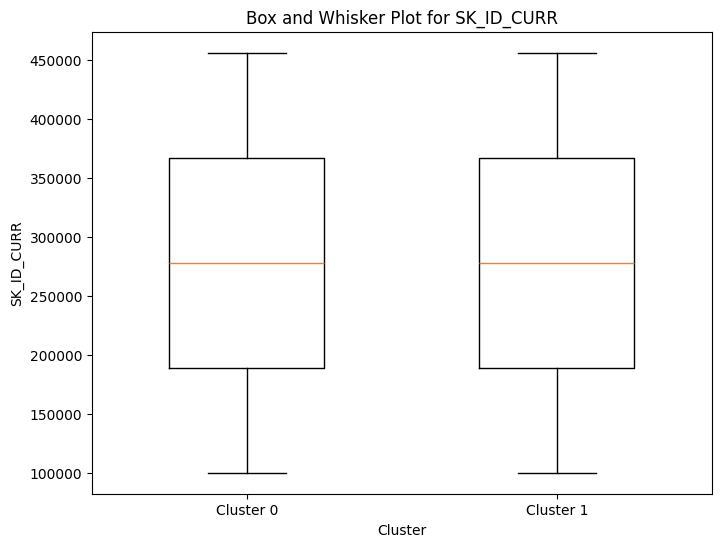

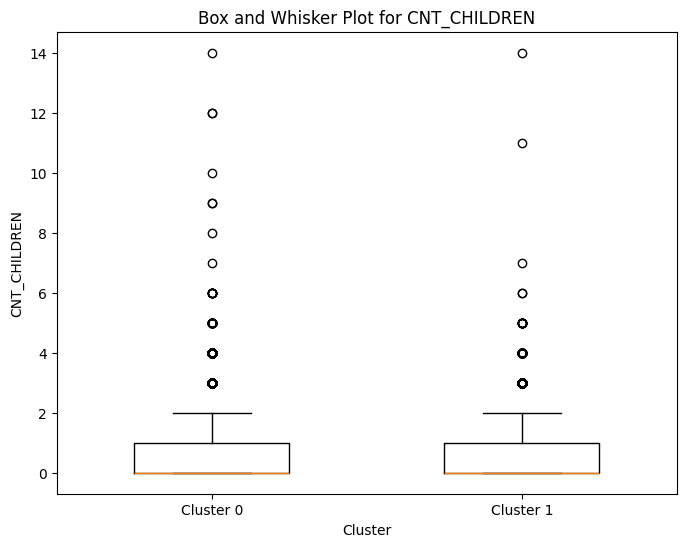

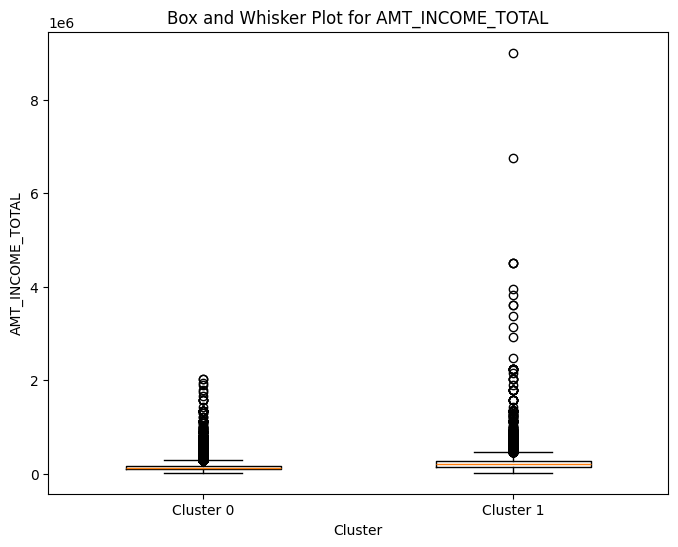

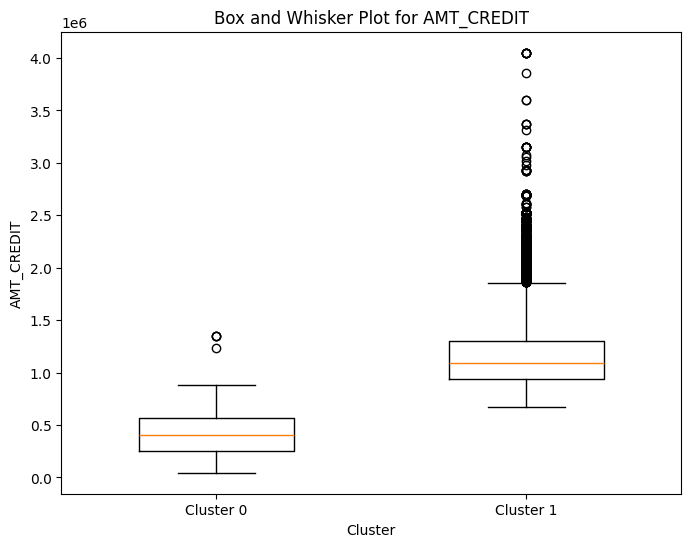

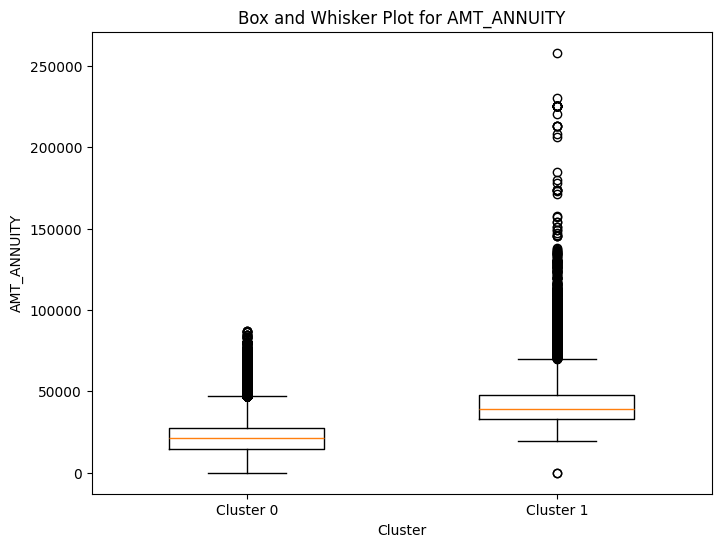

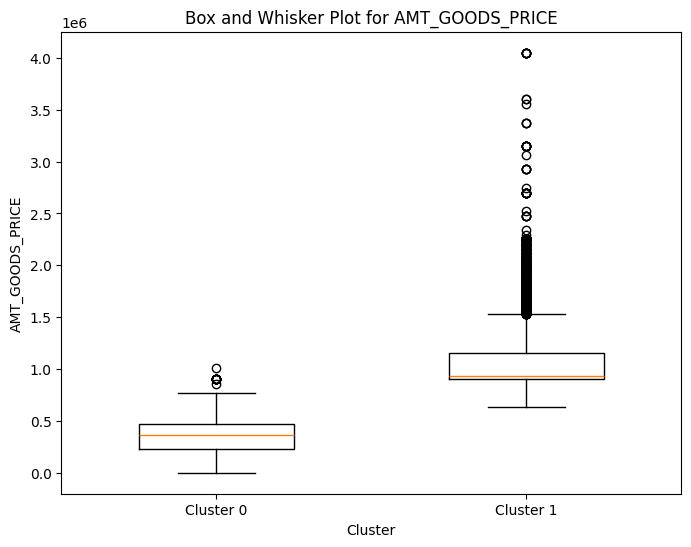

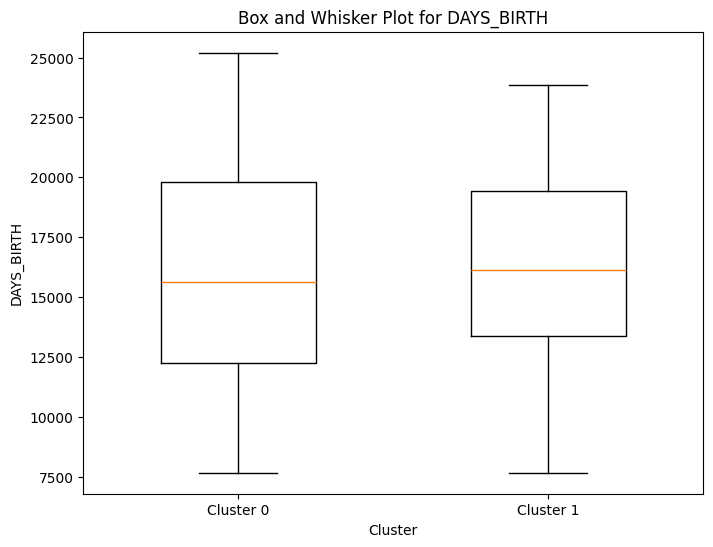

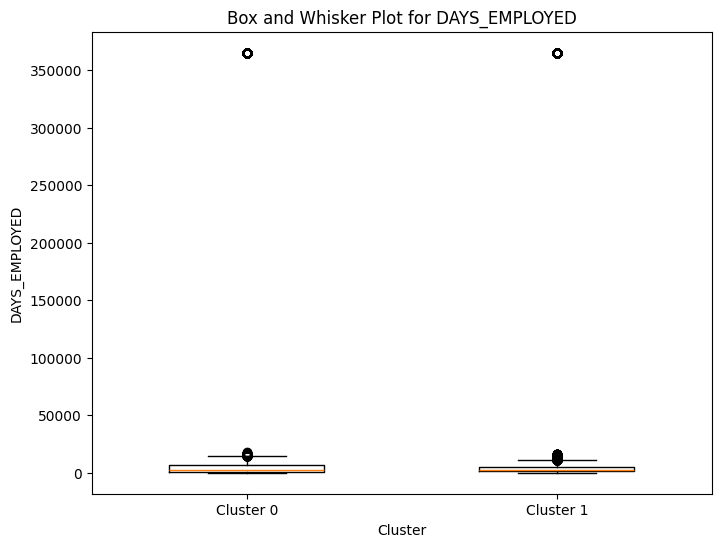

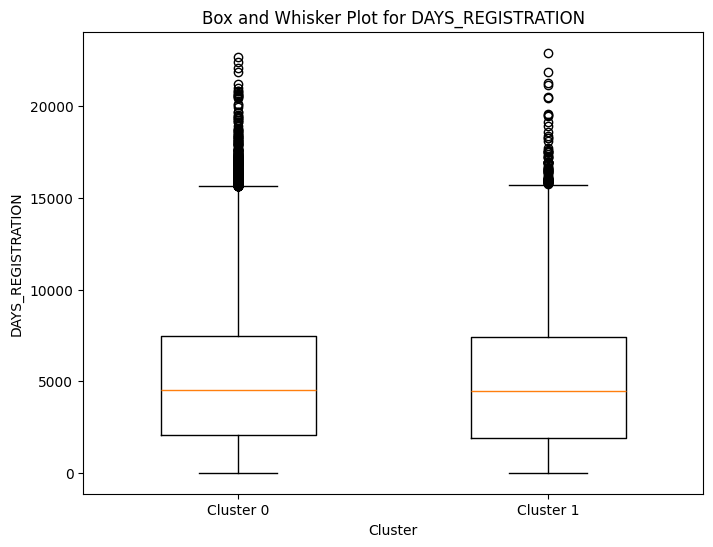

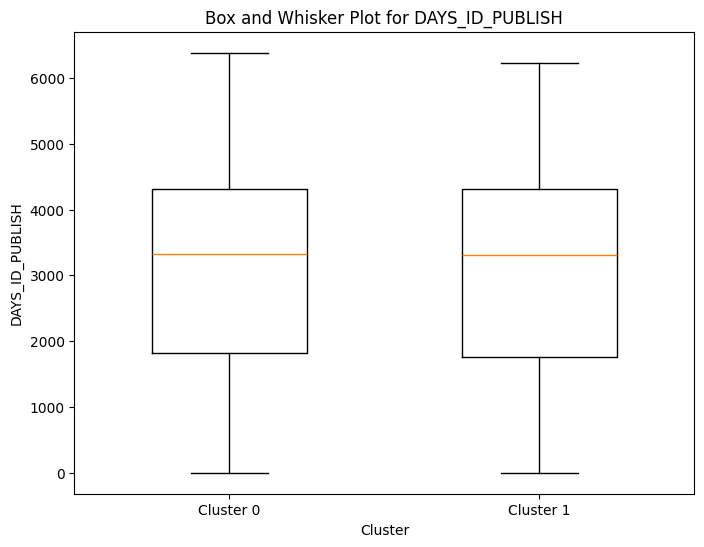

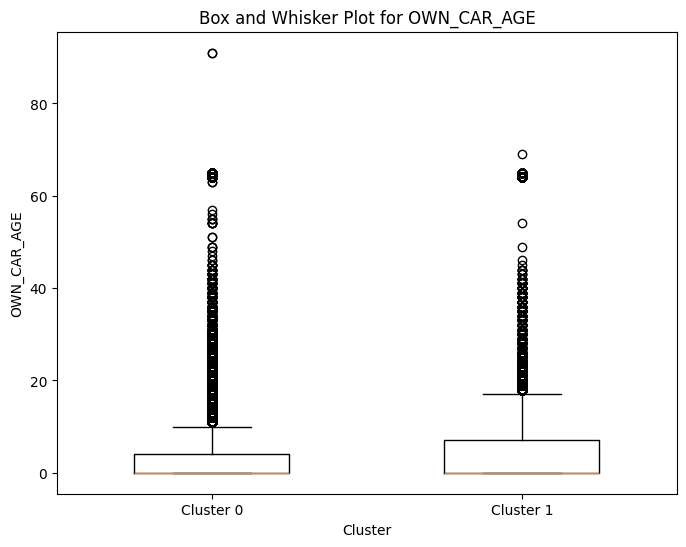

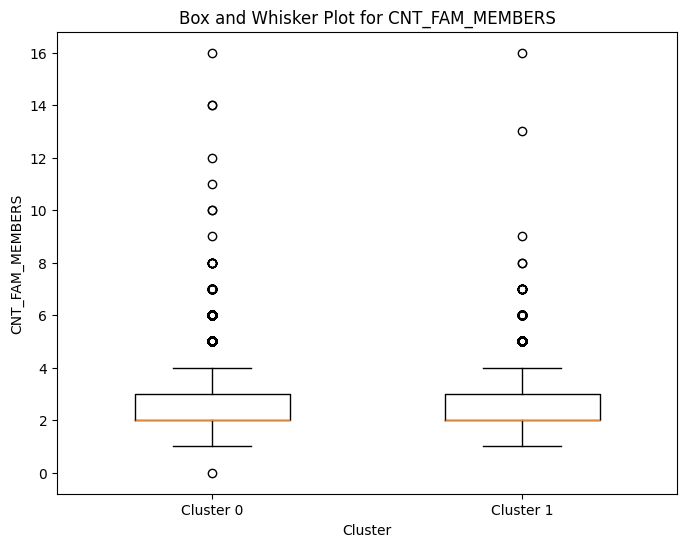

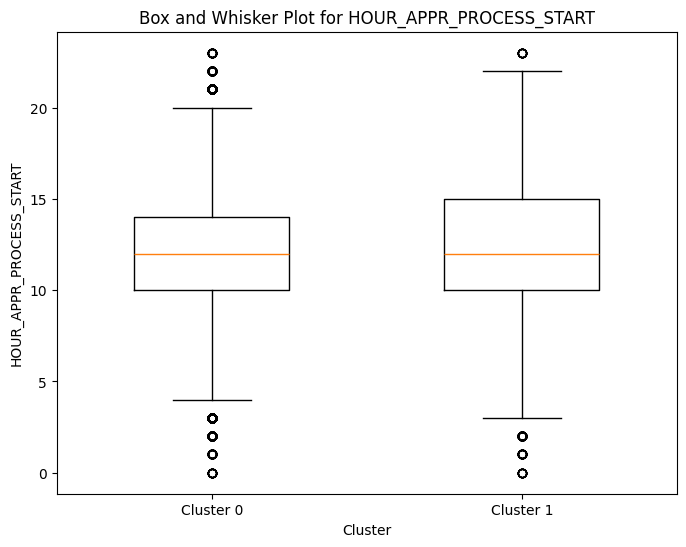

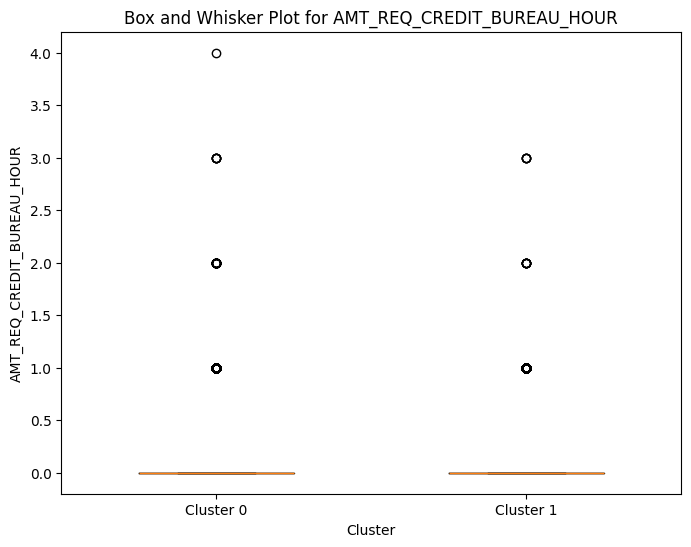

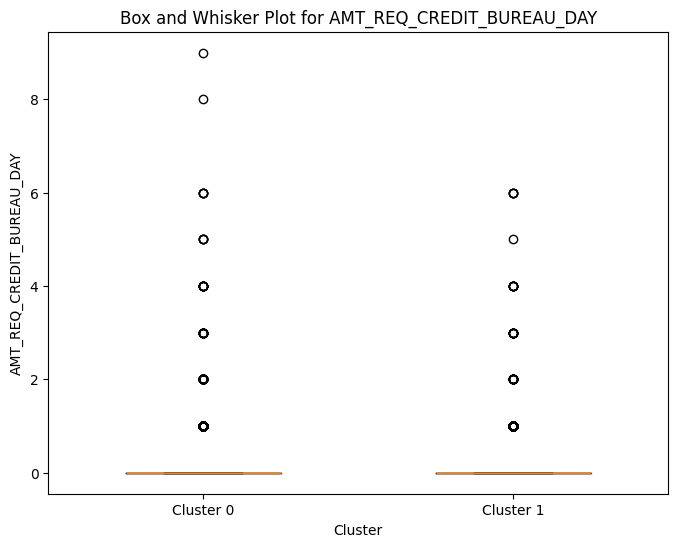

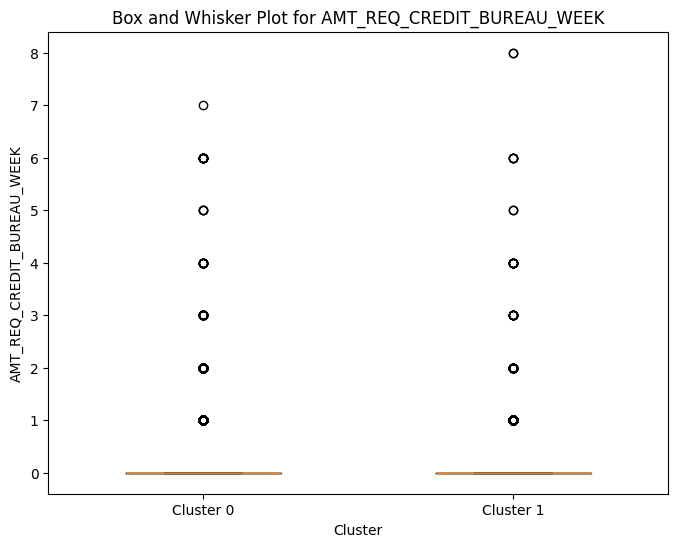

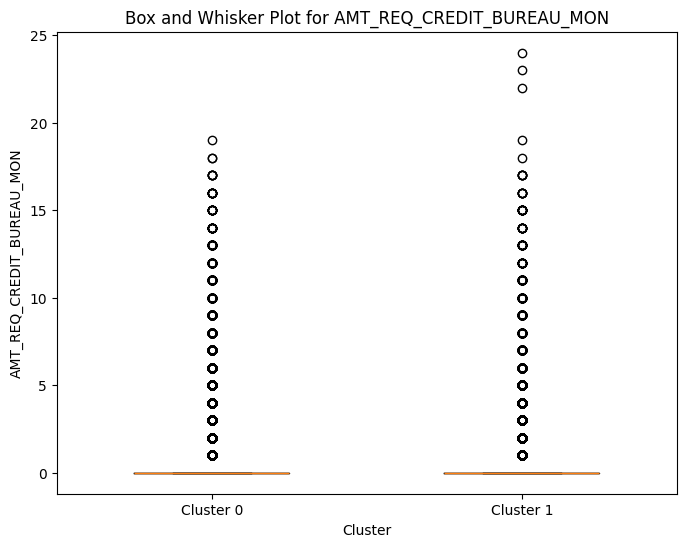

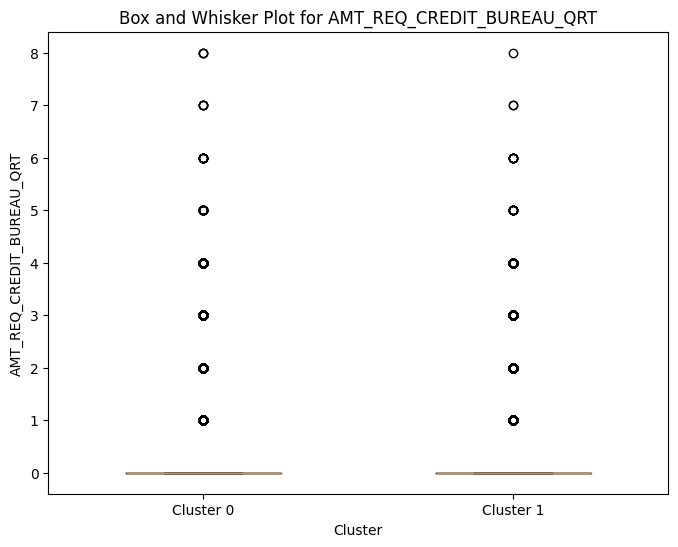

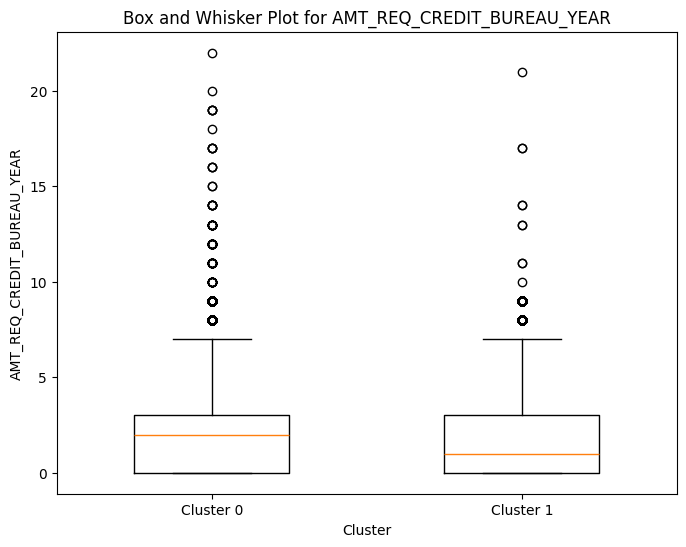

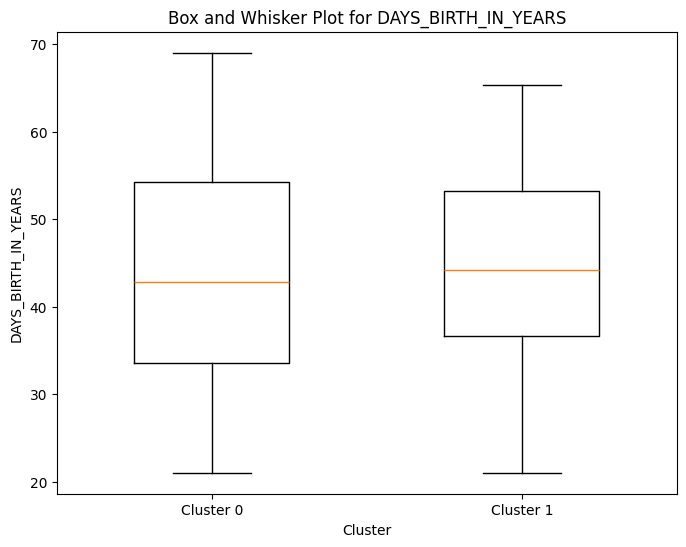

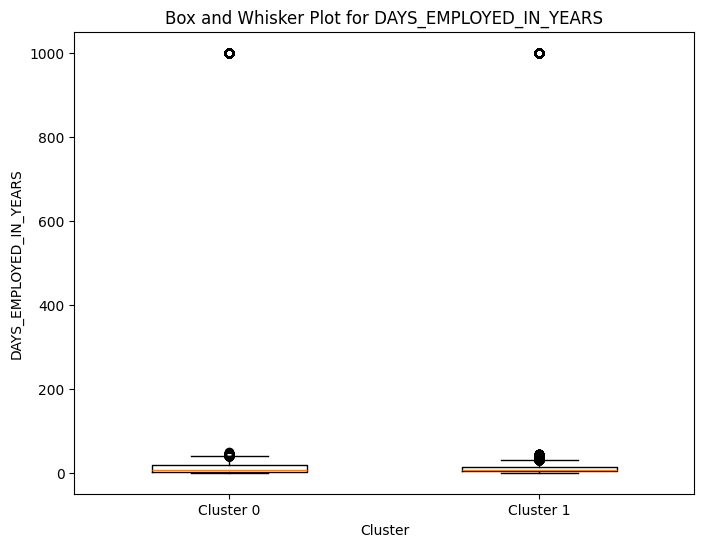

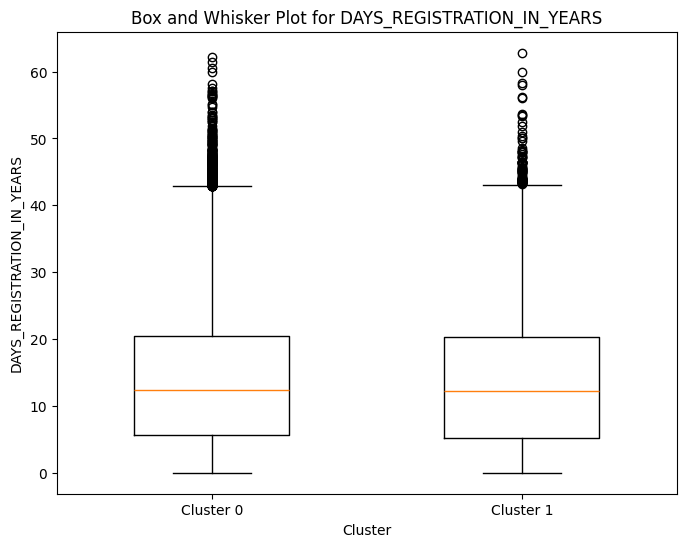

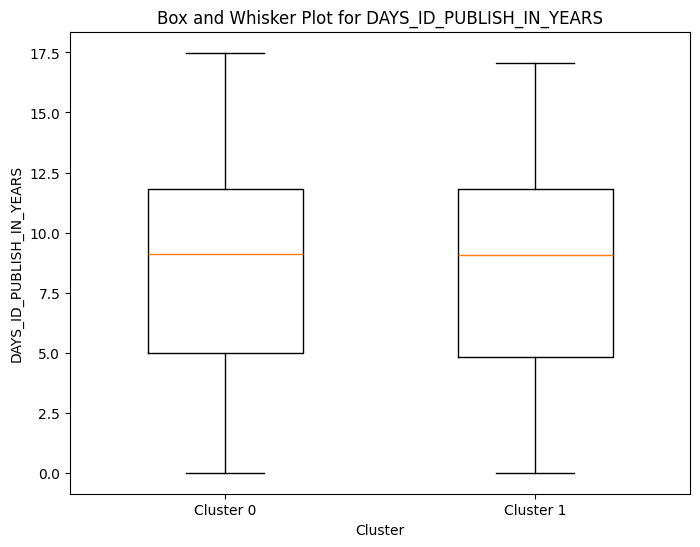

In [136]:
data_for_plots = []
for col in attributes_to_aggregate:
    col_data = predictions.select(col).rdd.flatMap(lambda x: x).collect()
    data_for_plots.append(col_data)

# Create box and whisker plots for each attribute
for i, col_data in enumerate(data_for_plots):
    plt.figure(figsize=(8, 6))
    plt.boxplot([col_data[j] for j in range(len(cluster_assignments)) if cluster_assignments[j] == 0], positions=[0], widths=0.5, labels=["Cluster 0"])
    plt.boxplot([col_data[j] for j in range(len(cluster_assignments)) if cluster_assignments[j] == 1], positions=[1], widths=0.5, labels=["Cluster 1"])
    plt.title(f'Box and Whisker Plot for {attributes_to_aggregate[i]}')
    plt.xlabel('Cluster')
    plt.ylabel(attributes_to_aggregate[i])
    plt.show()